## Importing the libraries

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

## Loading and preprocessing the dataset

In [125]:
(X_train, y_train), (_,_)= tf.keras.datasets.mnist.load_data()

In [126]:
X_train.shape

(60000, 28, 28)

In [127]:
no_pixels = 28*28
no_pixels

784

In [128]:
y_train.shape

(60000,)

7


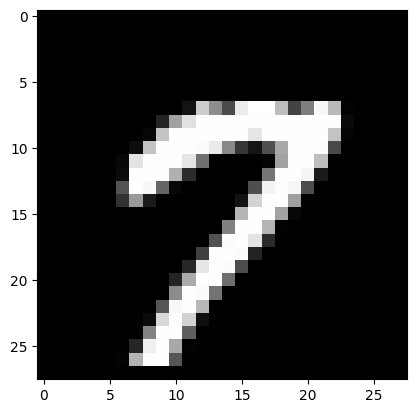

In [129]:
i = np.random.randint(0, 60000)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

In [130]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [131]:
X_train.shape

(60000, 28, 28, 1)

In [132]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [133]:
# X_train = X_train/255
X_train = (X_train - 127.5)/127.5

In [134]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [135]:
buffer_size = 60000
batch_size = 256

In [136]:
buffer_size / batch_size

234.375

In [137]:
type(X_train)

numpy.ndarray

In [138]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [139]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [140]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [141]:
7*7*256

12544

In [142]:
def build_generator():
    network = tf.keras.Sequential()
    network.add(layers.Dense(7*7*256, use_bias = False, input_shape = (100, )))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 7x7x256
    network.add(layers.Reshape((7, 7, 256)))
    network.add(layers.Conv2DTranspose(128, (5,5), padding = 'same', use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 14x14x64
    network.add(layers.Conv2DTranspose(64, (5,5), strides=(2, 2) ,padding = 'same', use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())
    
    # 28x28x1
    network.add(layers.Conv2DTranspose(1, (5,5), strides=(2, 2) ,padding = 'same', use_bias=False, activation='tanh'))

    network.summary()

    return network

In [143]:
generator = build_generator()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [144]:
noise = tf.random.normal([1, 100])

In [145]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.96264744, -0.18133627,  0.26492962,  1.4666064 ,  0.4072143 ,
         0.15571629,  1.0453609 ,  0.05829679,  0.87431747, -0.8265167 ,
         0.33910638, -0.09020525, -0.11107964, -0.5260682 , -1.3092467 ,
        -0.25962013,  0.43923557,  0.7009829 , -1.046217  ,  0.3459581 ,
         0.16542375,  0.14308083,  2.1099808 ,  0.77306646,  1.2129718 ,
        -0.96593046,  0.64111567, -0.9173577 , -0.6566413 , -0.15638551,
        -0.17028873, -0.13932727,  0.48973322,  1.7715988 ,  1.2834682 ,
        -0.9085058 , -0.4731392 ,  0.60634774,  1.4756931 , -1.394417  ,
         0.5859692 , -0.6588335 , -0.6295676 , -2.0402076 , -0.23443654,
        -0.16244046,  0.5228159 ,  0.94266516,  0.9667983 ,  1.6465912 ,
         0.2579823 ,  1.719463  ,  1.3214253 ,  0.44929793,  0.88197875,
        -1.2553151 , -0.4586551 , -1.2340713 ,  1.1547548 ,  0.92481446,
         0.6110451 , -0.8057187 , -1.2058573 ,  0.6559353 ,  0.5688044 ,
 

In [146]:
generated_image = generator(noise, training= False)

In [147]:
generated_image.shape

TensorShape([1, 28, 28, 1])

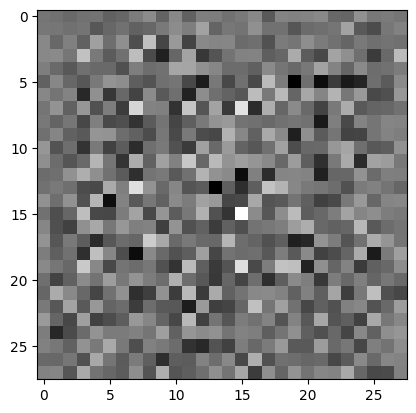

In [148]:
plt.imshow(generated_image[0,:,:,0], cmap = 'gray')

## Build Discriminator

In [149]:
def build_descriminator():
    network = tf.keras.Sequential()
    
    # 14x14x64
    network.add(layers.Conv2D(64, (5, 5), strides = (2, 2), padding = 'same', input_shape=[28, 28, 1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # 7x7x128
    network.add(layers.Conv2D(128, (5, 5), strides = (2, 2), padding = 'same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()

    return network

In [150]:
7 * 7 * 128

6272

In [151]:
descriminator = build_descriminator()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
descriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00226112]], dtype=float32)>

## Calculating the loss

In [153]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [154]:
def descriminator_loss(expected_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = fake_loss + real_loss
    return total_loss

In [155]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [156]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
descriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

## Training the model

In [157]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [158]:
epochs = 100
noise_dim = 100
num_images_to_generate = 16

In [159]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)

        expected_output = descriminator(images, training= True)
        fake_output = descriminator(generated_images, training = True)

        gen_loss = generator_loss(fake_output)
        desc_loss = descriminator_loss(expected_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_descriminator = disc_tape.gradient(desc_loss, descriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    descriminator_optimizer.apply_gradients(zip(gradients_of_descriminator, descriminator.trainable_variables))

In [160]:
test_images = tf.random.normal([num_images_to_generate, noise_dim])

In [161]:
test_images.shape

TensorShape([16, 100])

In [162]:
60000/256

234.375

In [163]:
def train(dataset, epochs, test_images):
    for epoch in range(epochs):
        for image_batch in dataset:
            #print(image_batch.shape)
            train_step(image_batch)
        
        print('Epoch: ', epoch + 1)
        generated_images = generator(test_images, training = False)
        fig = plt.figure(figsize=(10,10))
        for i in range(generated_images.shape[0]):
            plt.subplot(4, 4, i+1)
            plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap = 'gray')
            plt.axis('off')
        plt.show()


Epoch:  1


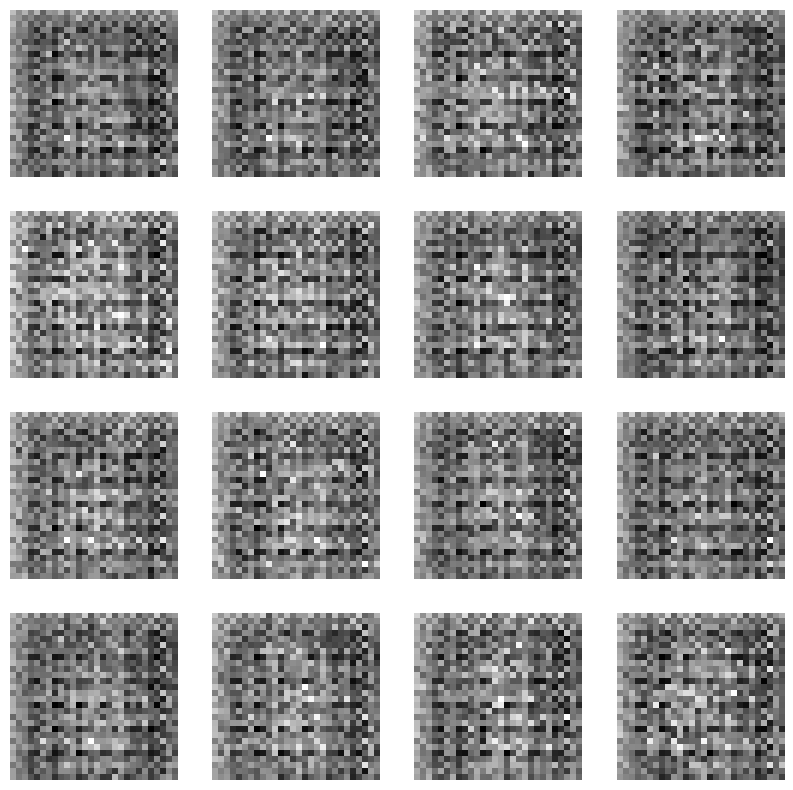

Epoch:  2


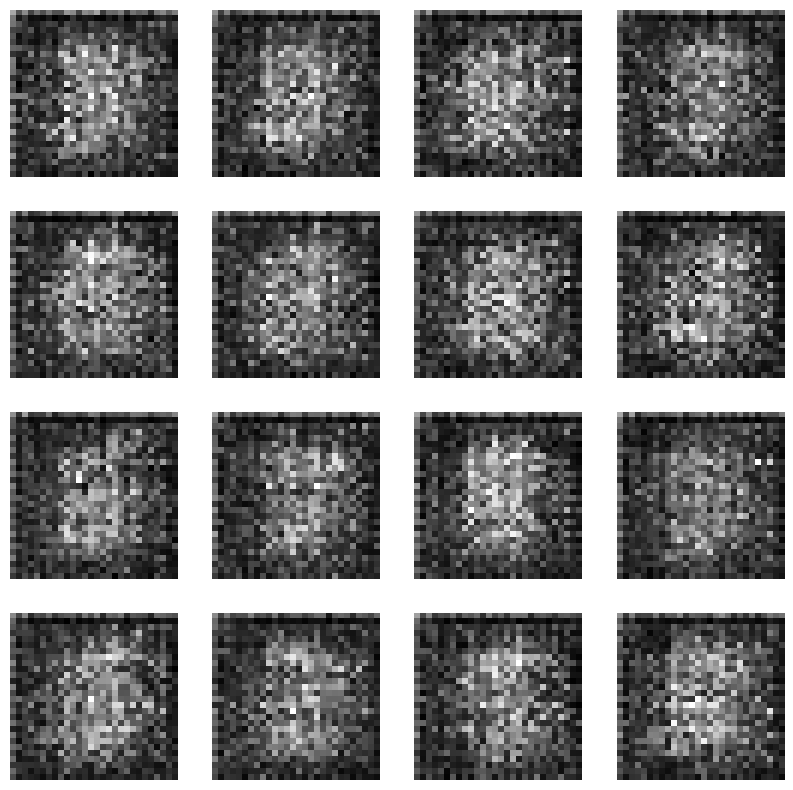

Epoch:  3


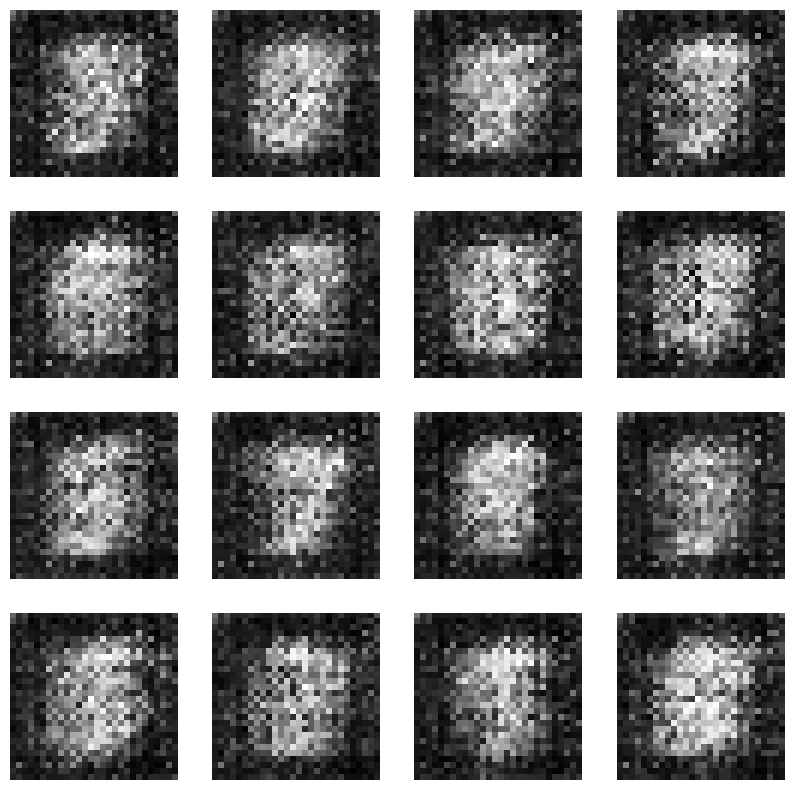

Epoch:  4


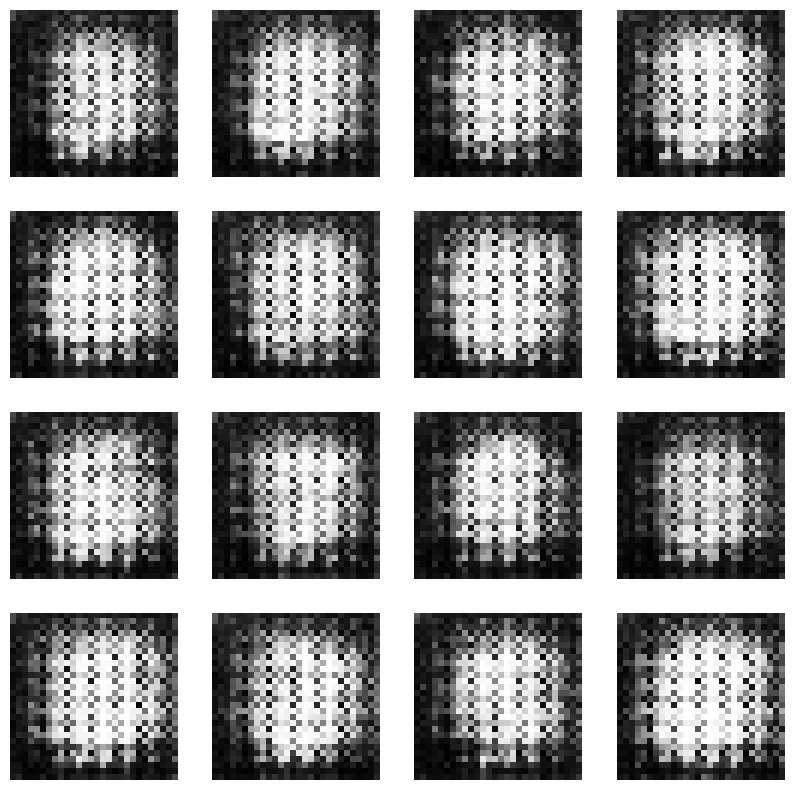

Epoch:  5


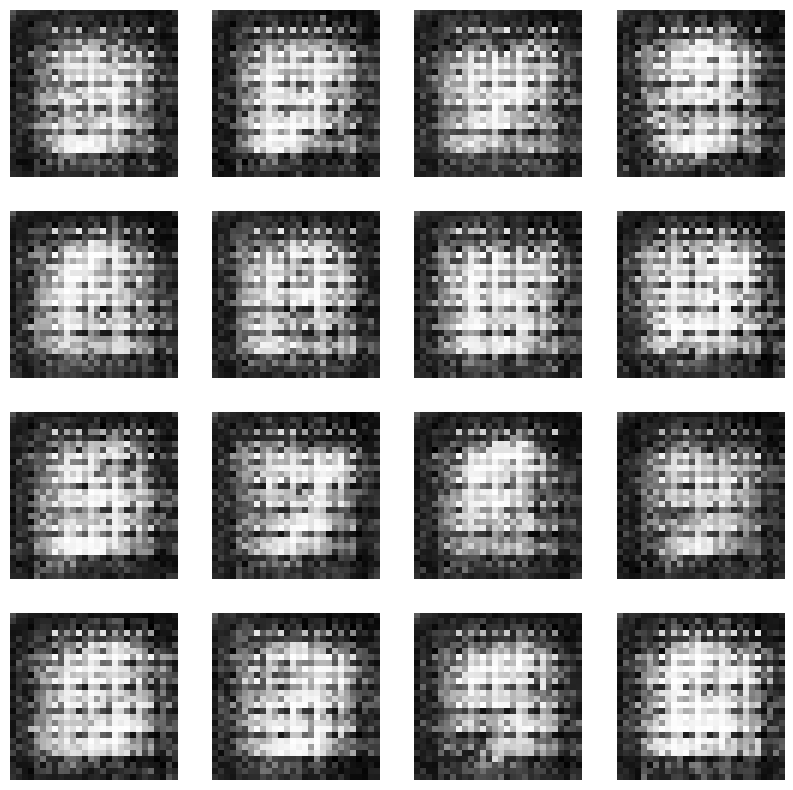

Epoch:  6


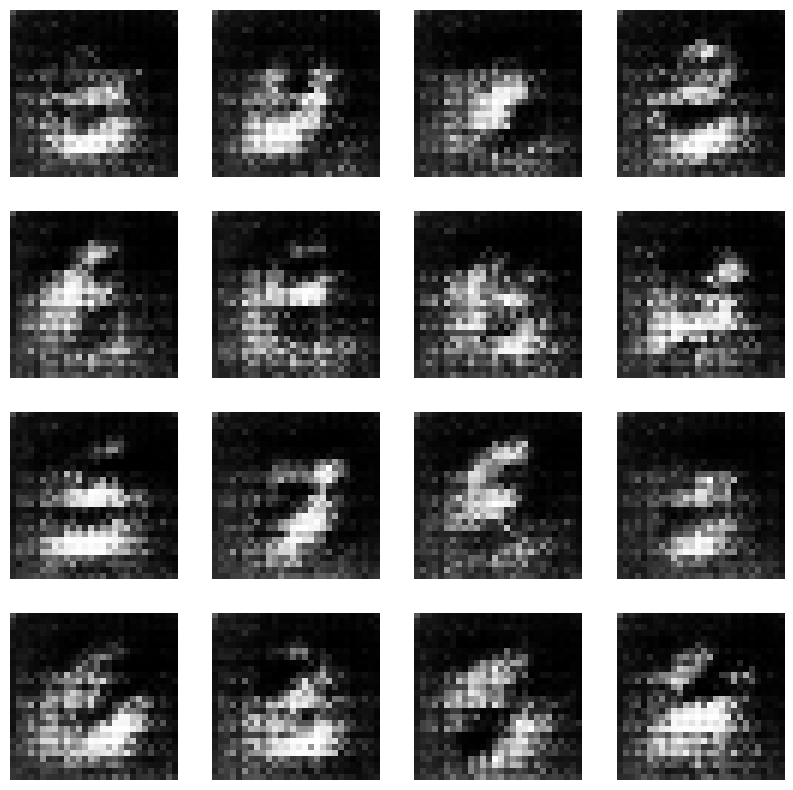

Epoch:  7


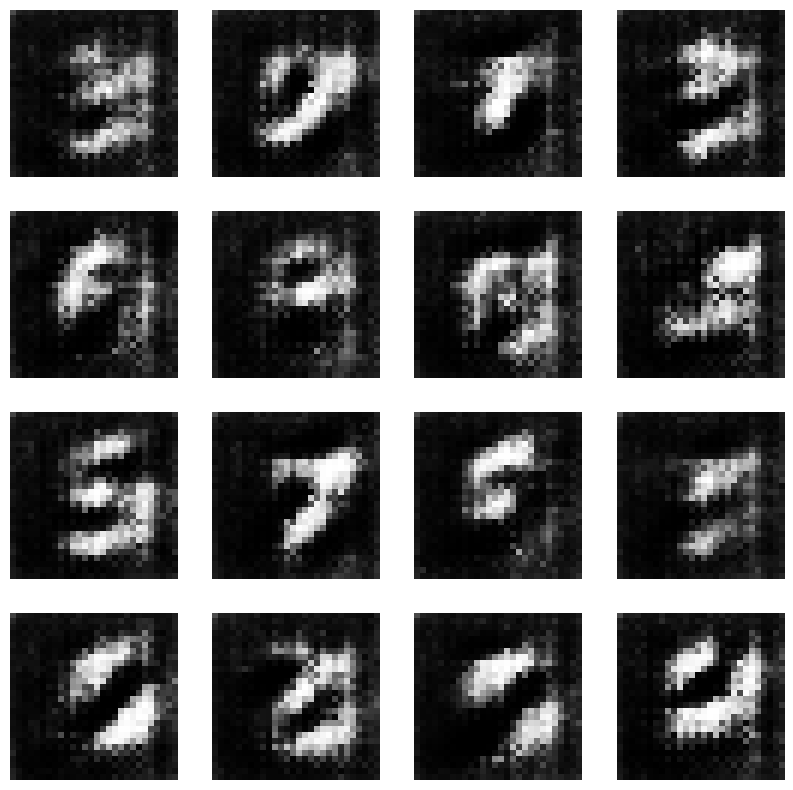

Epoch:  8


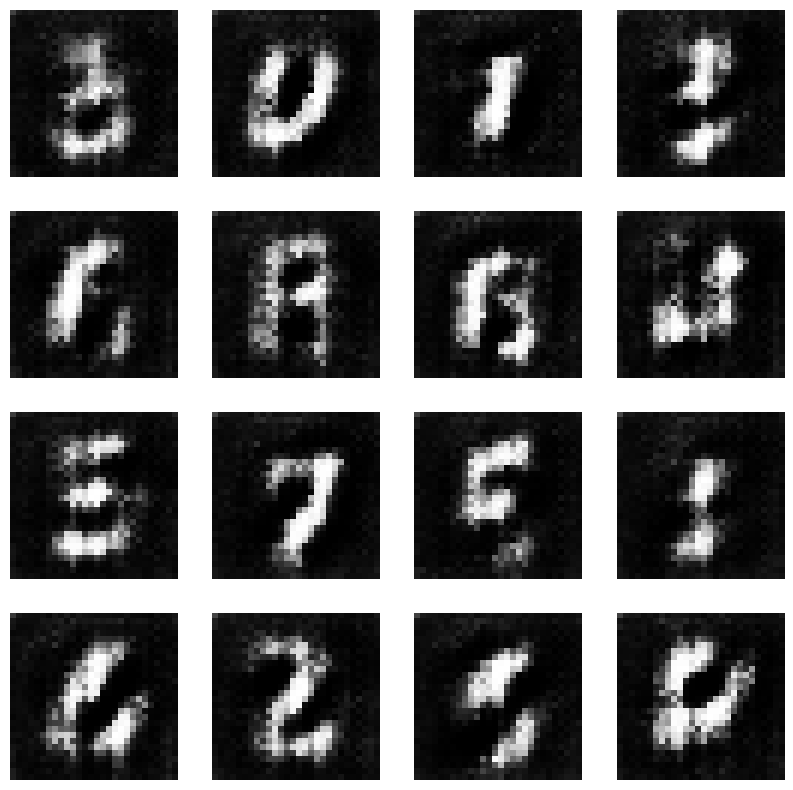

Epoch:  9


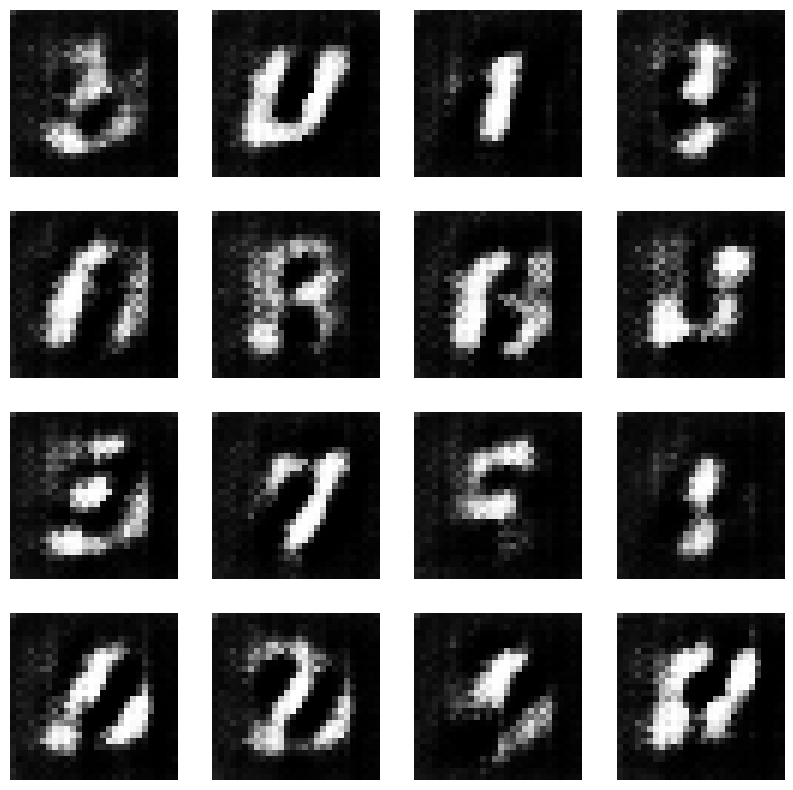

Epoch:  10


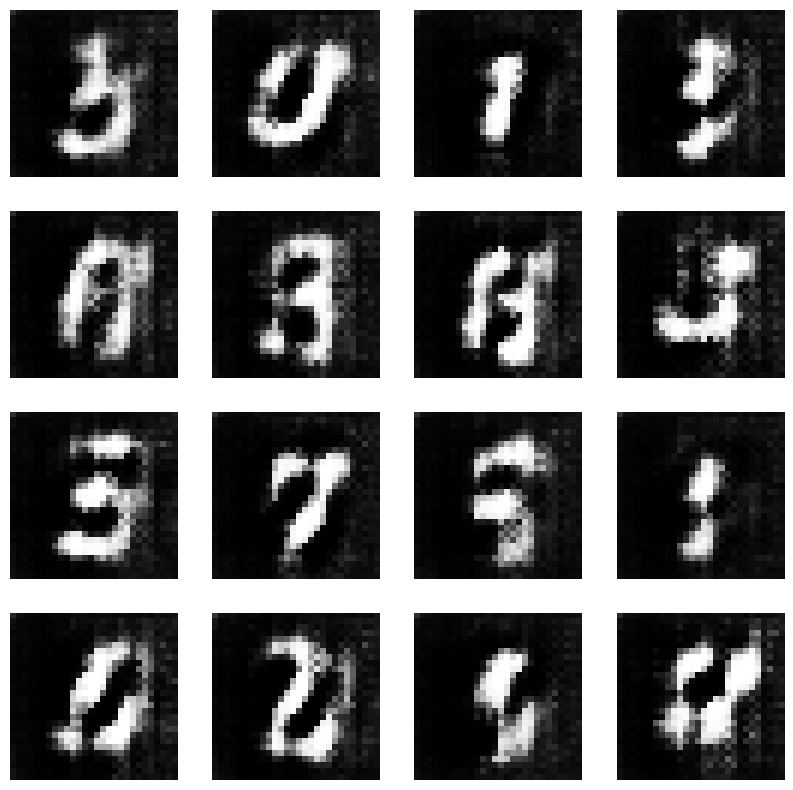

Epoch:  11


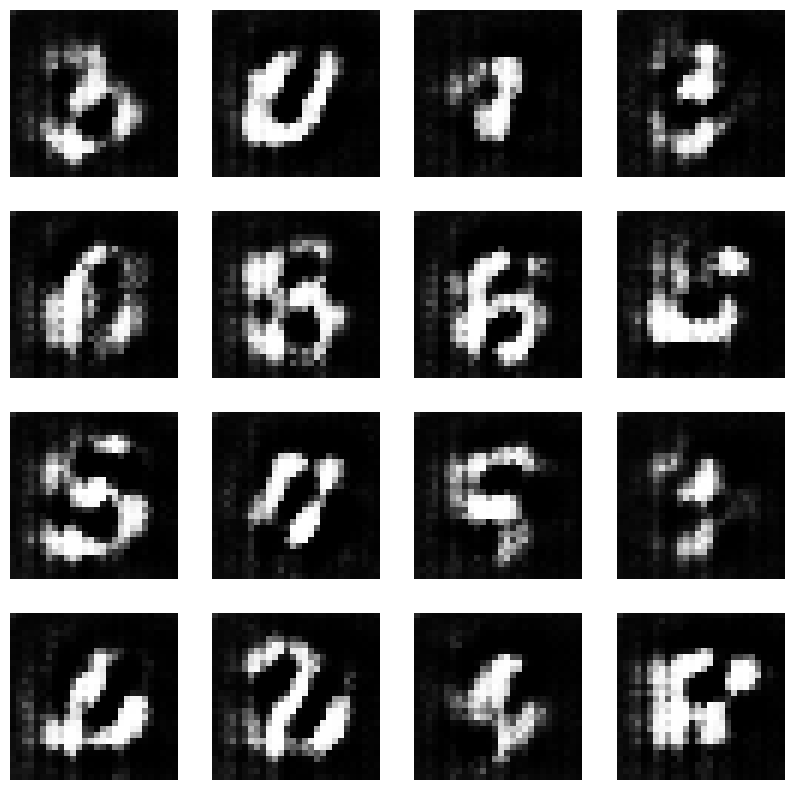

Epoch:  12


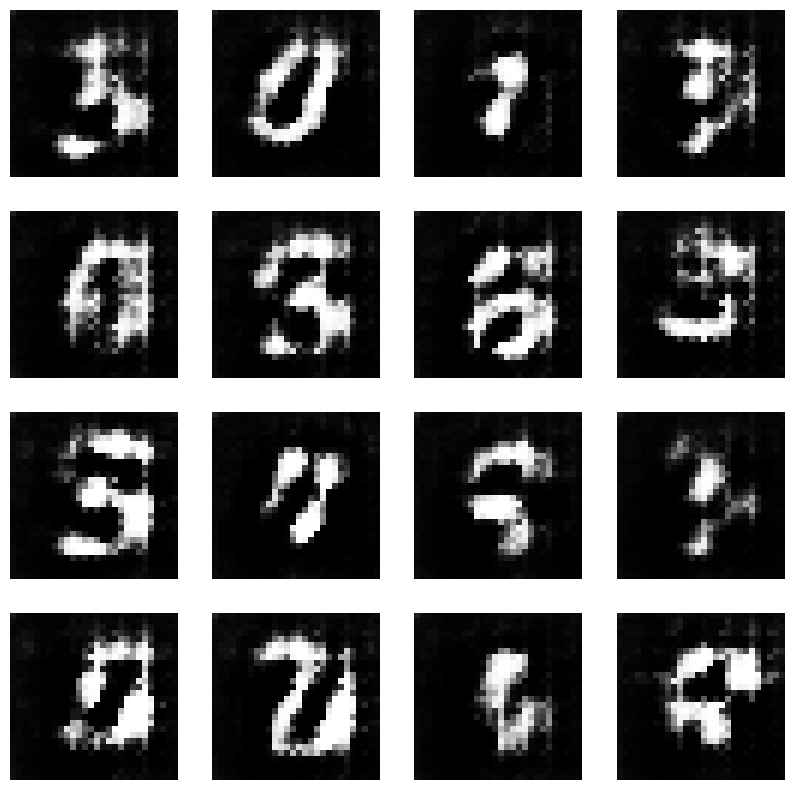

Epoch:  13


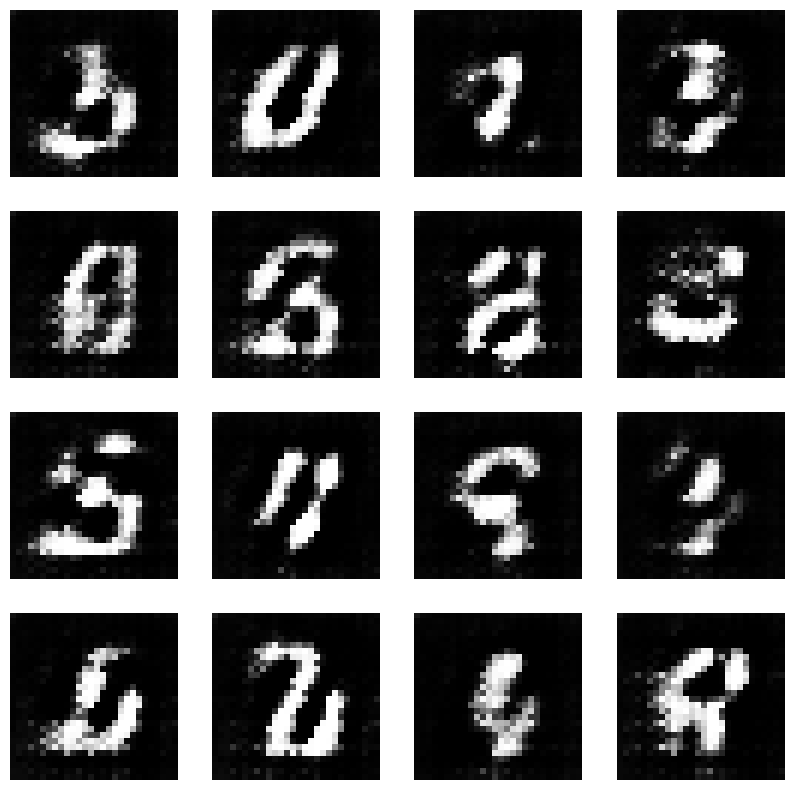

Epoch:  14


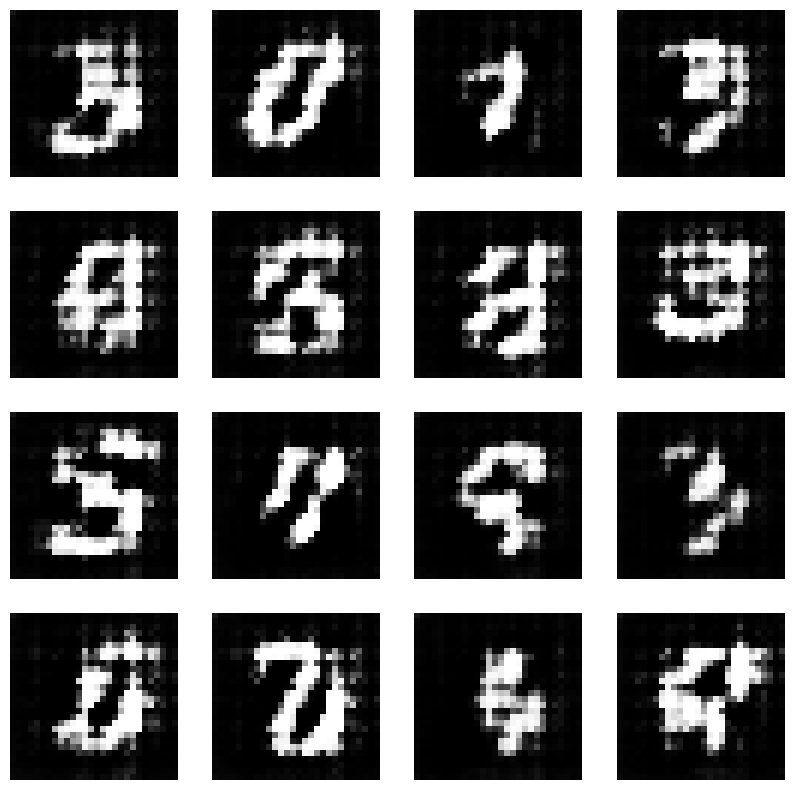

Epoch:  15


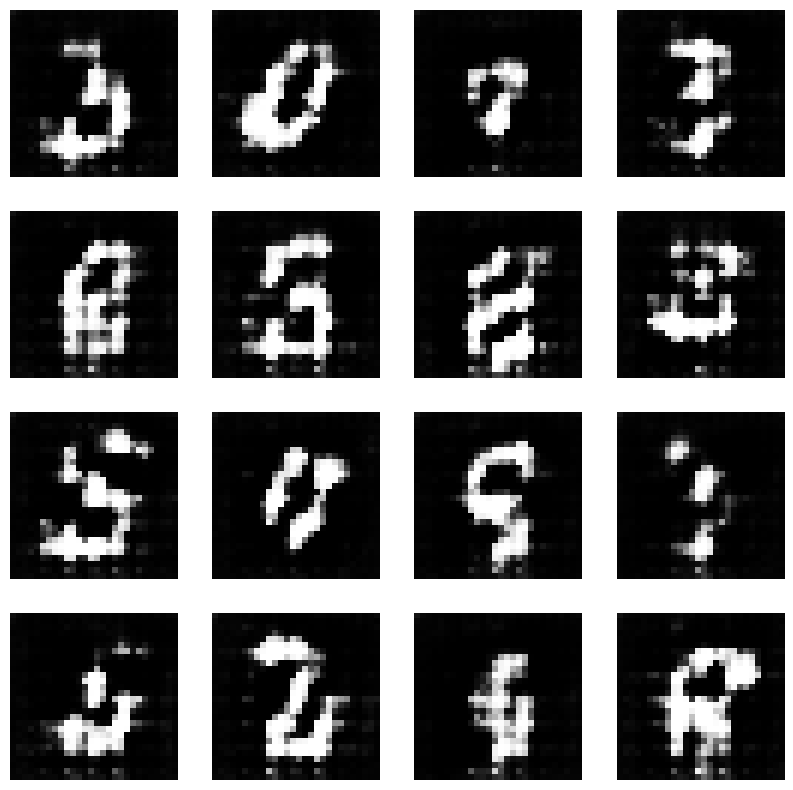

Epoch:  16


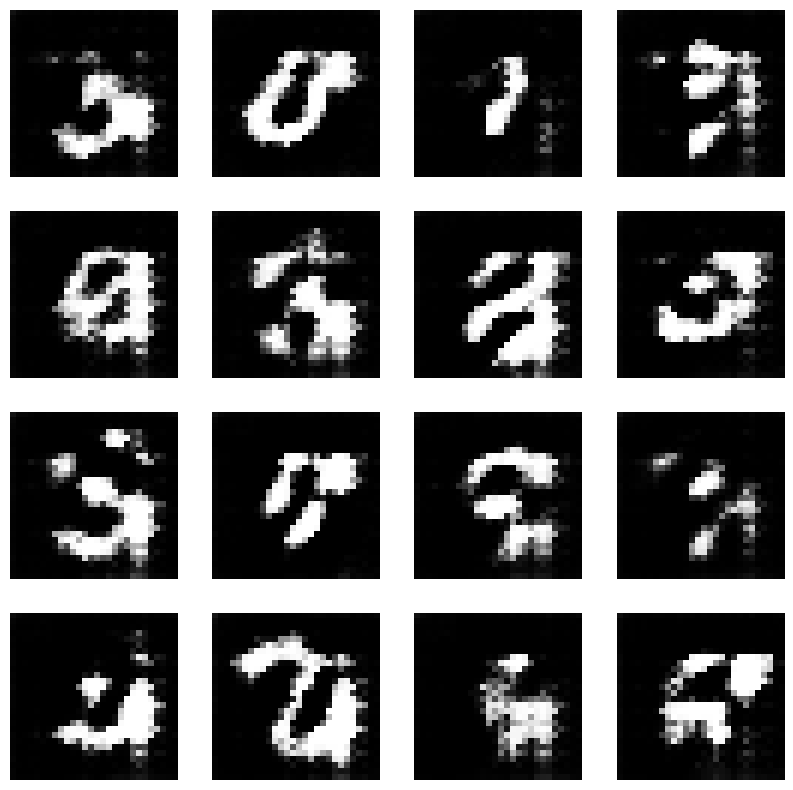

Epoch:  17


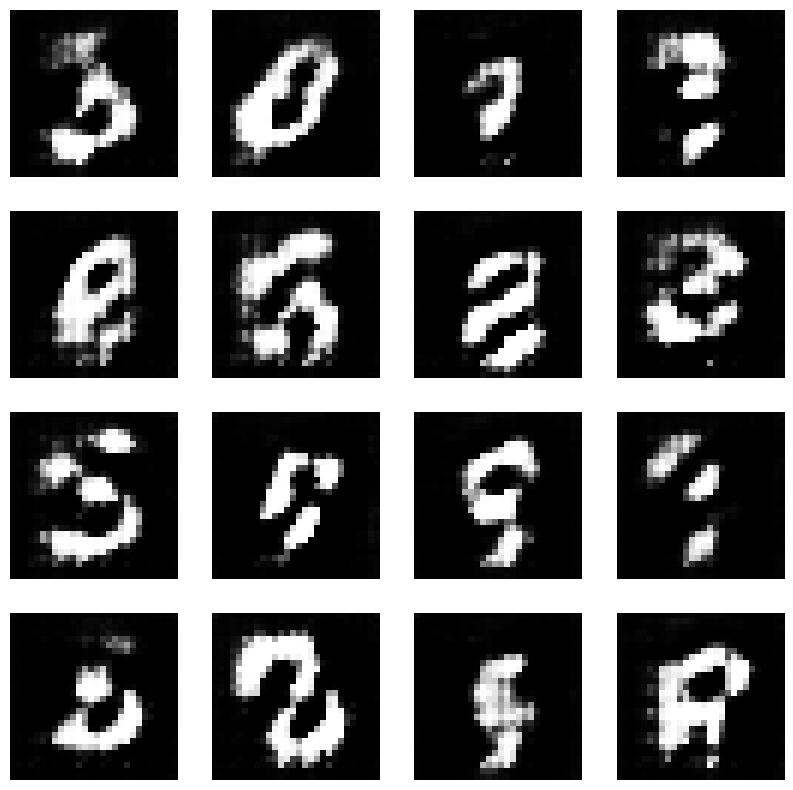

Epoch:  18


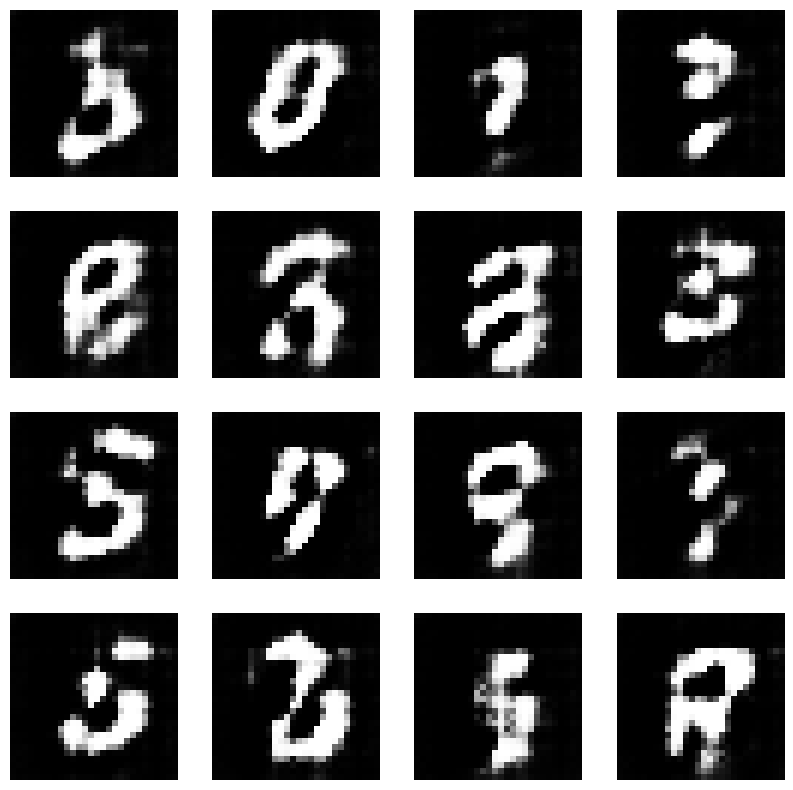

Epoch:  19


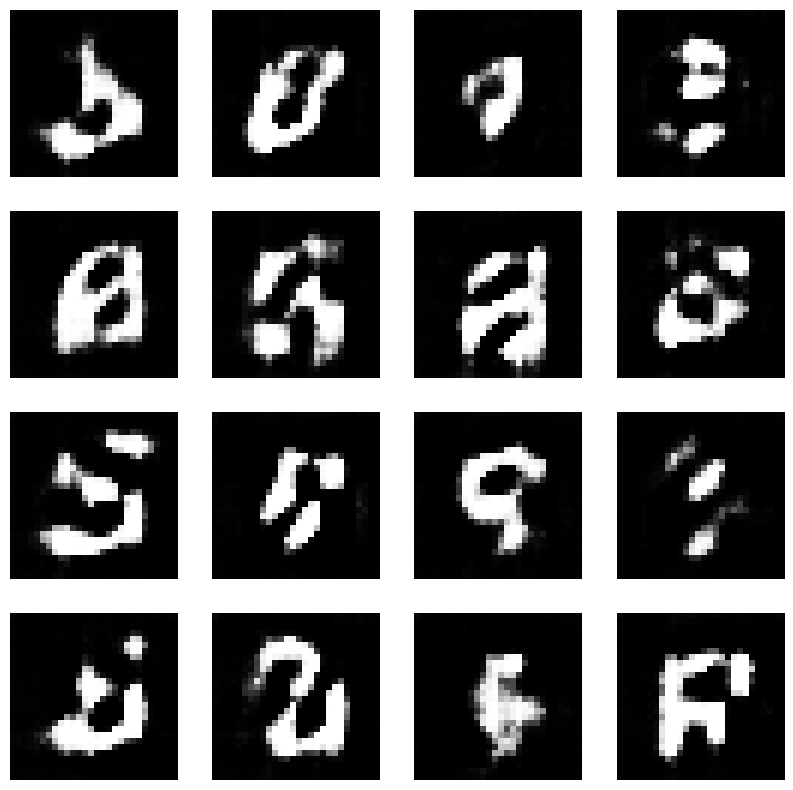

Epoch:  20


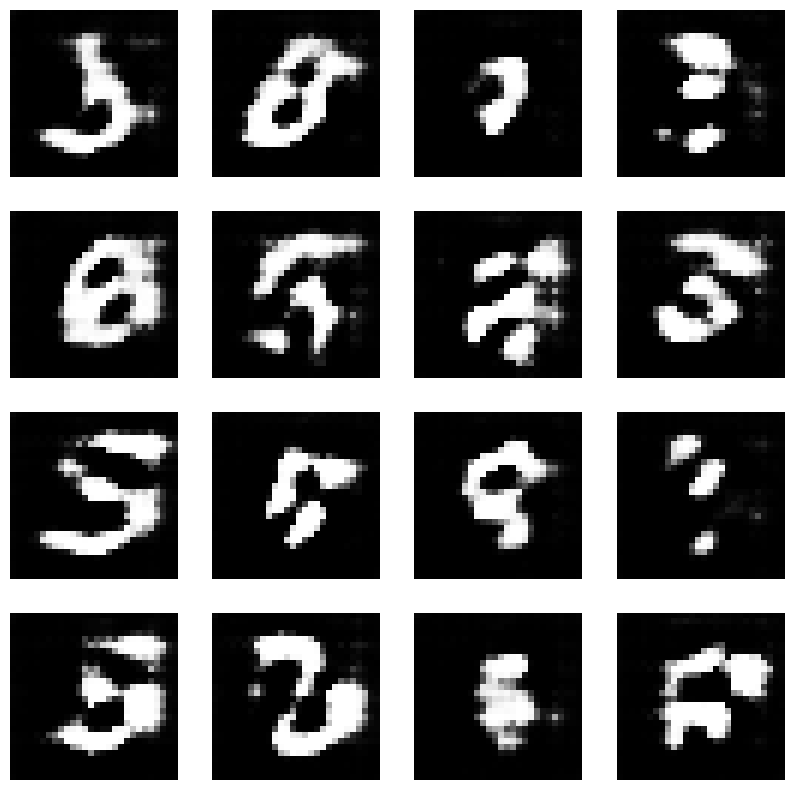

Epoch:  21


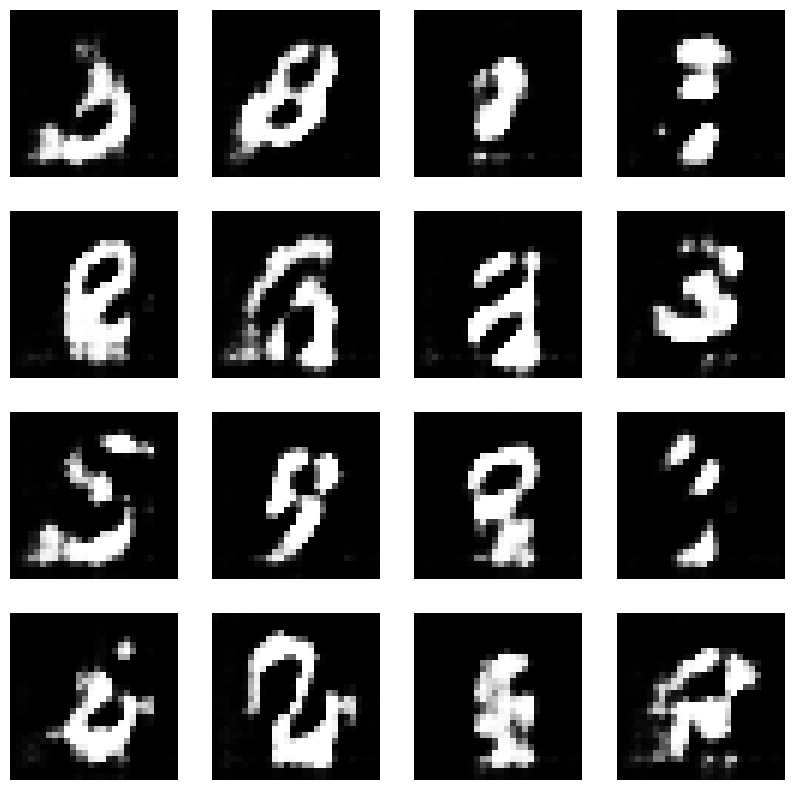

Epoch:  22


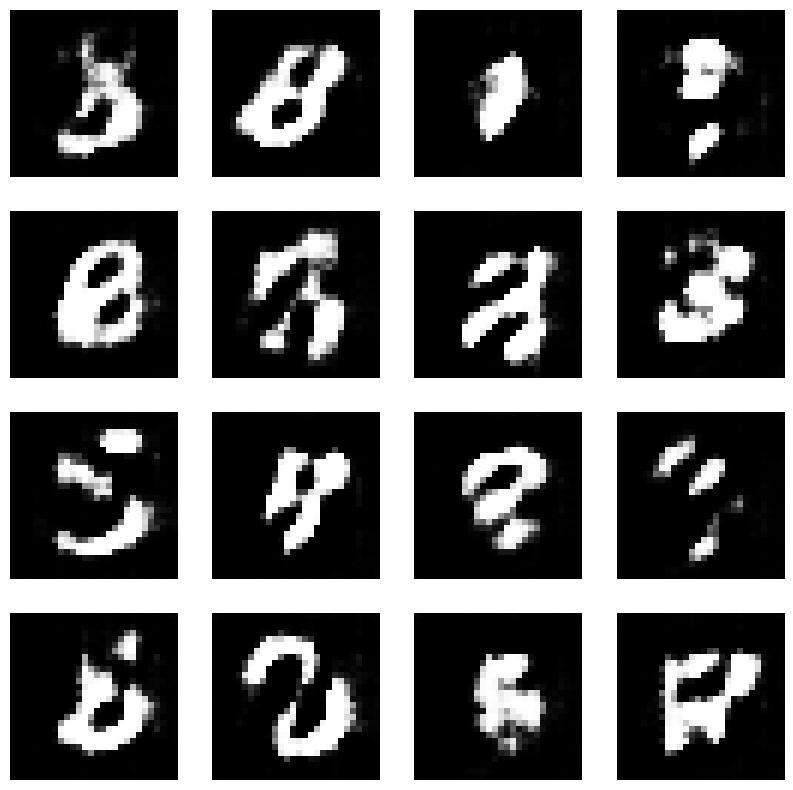

Epoch:  23


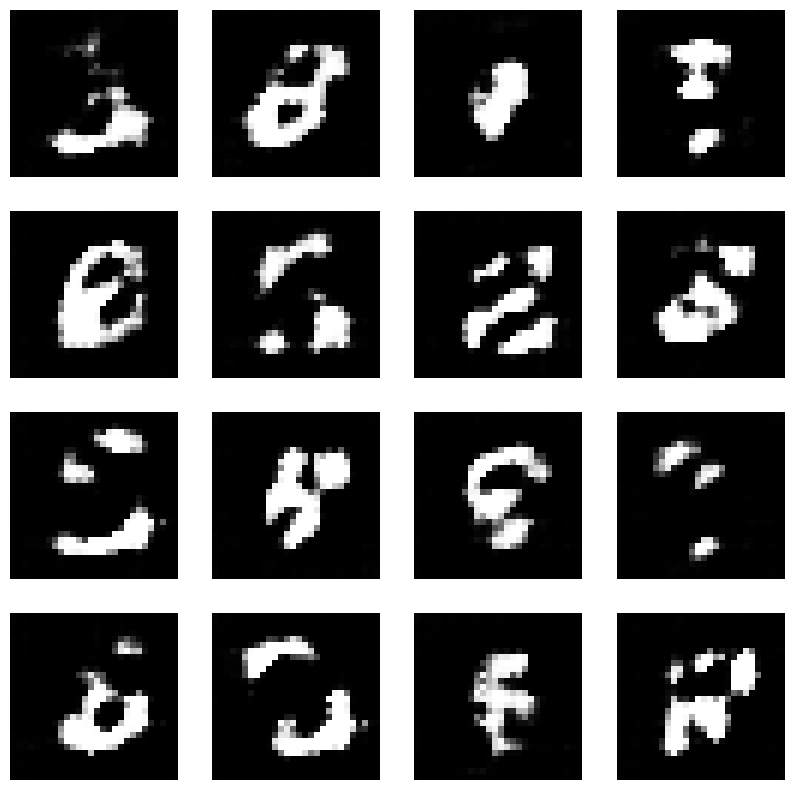

Epoch:  24


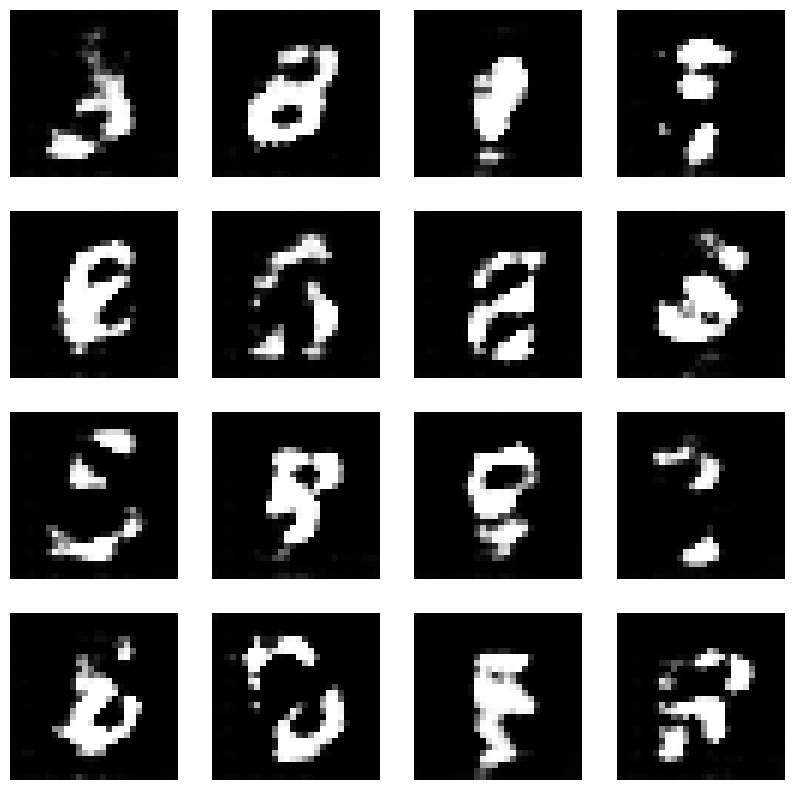

Epoch:  25


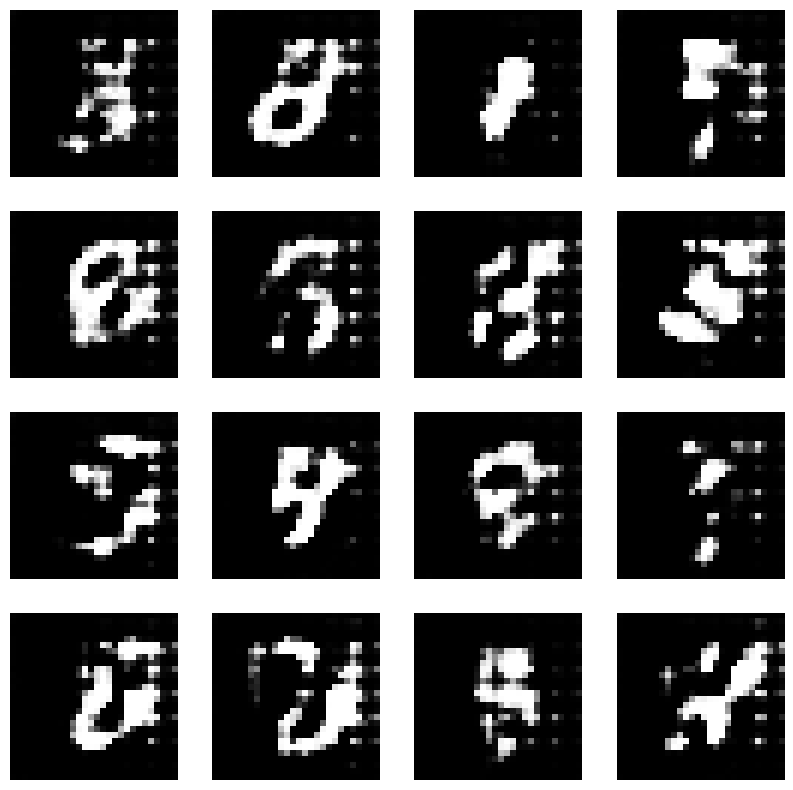

Epoch:  26


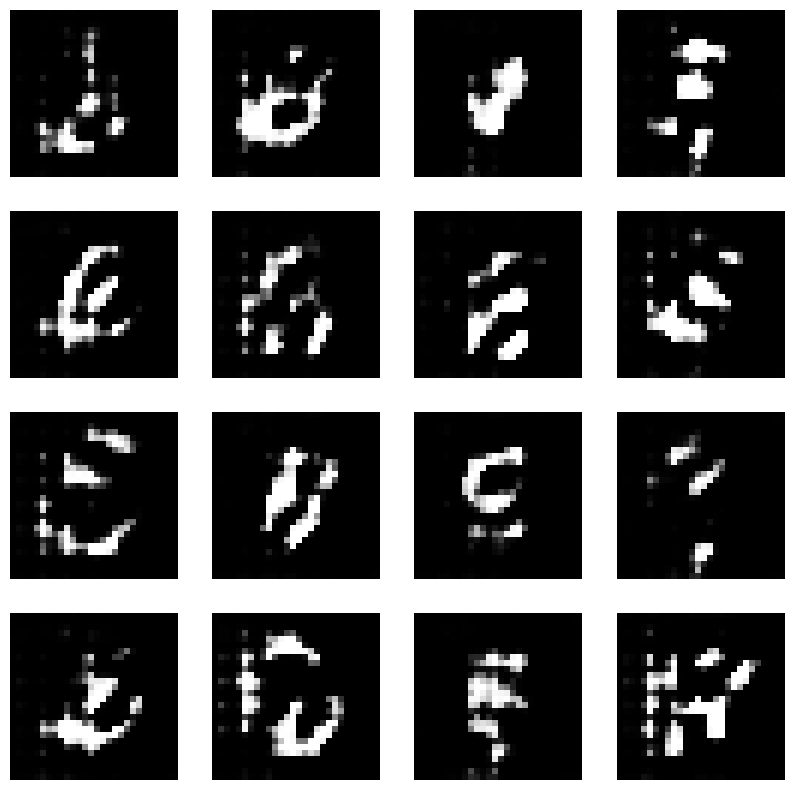

Epoch:  27


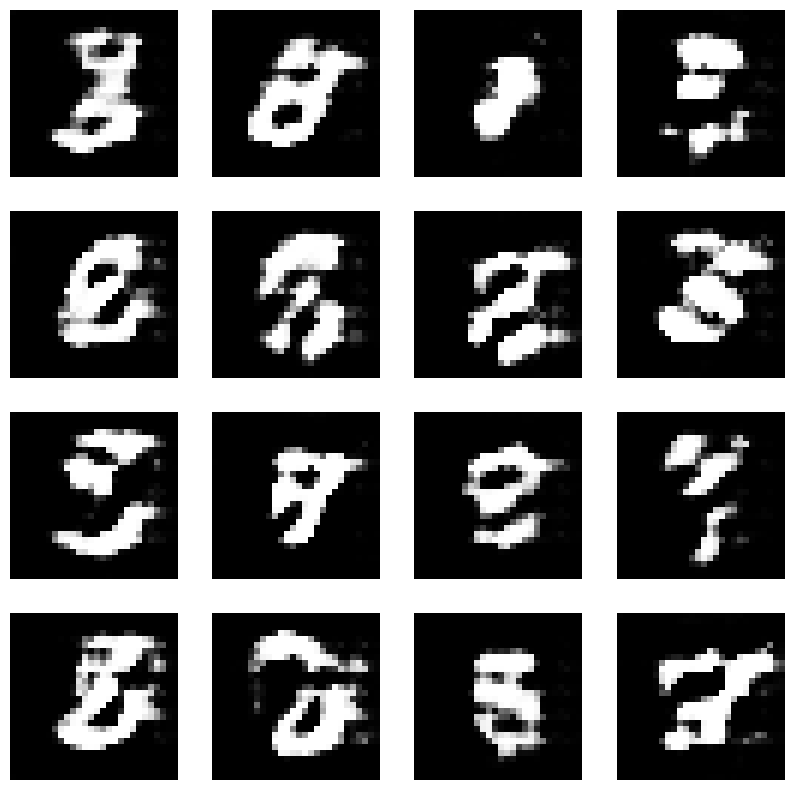

Epoch:  28


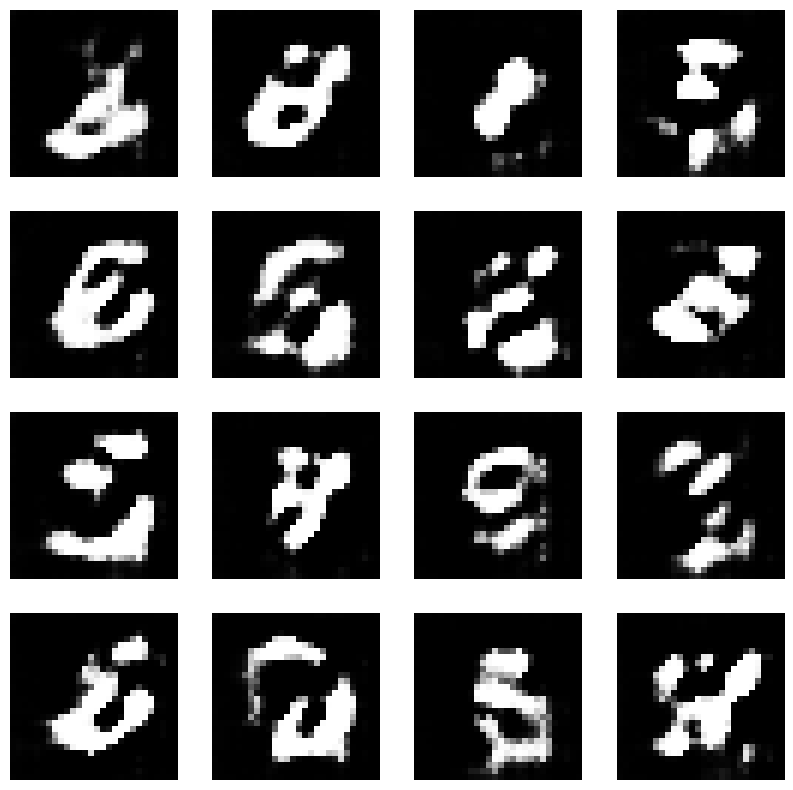

Epoch:  29


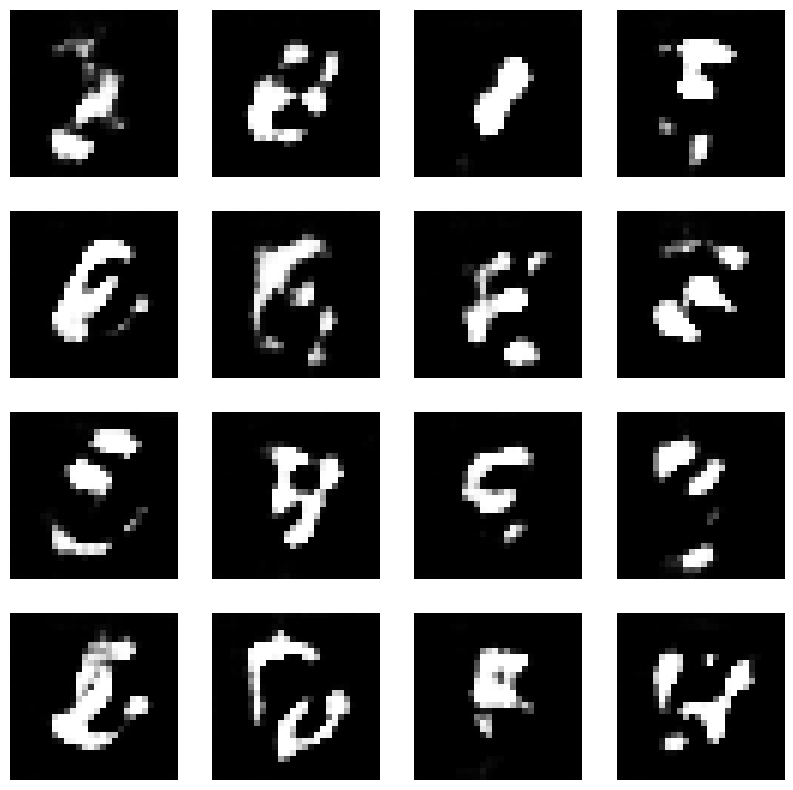

Epoch:  30


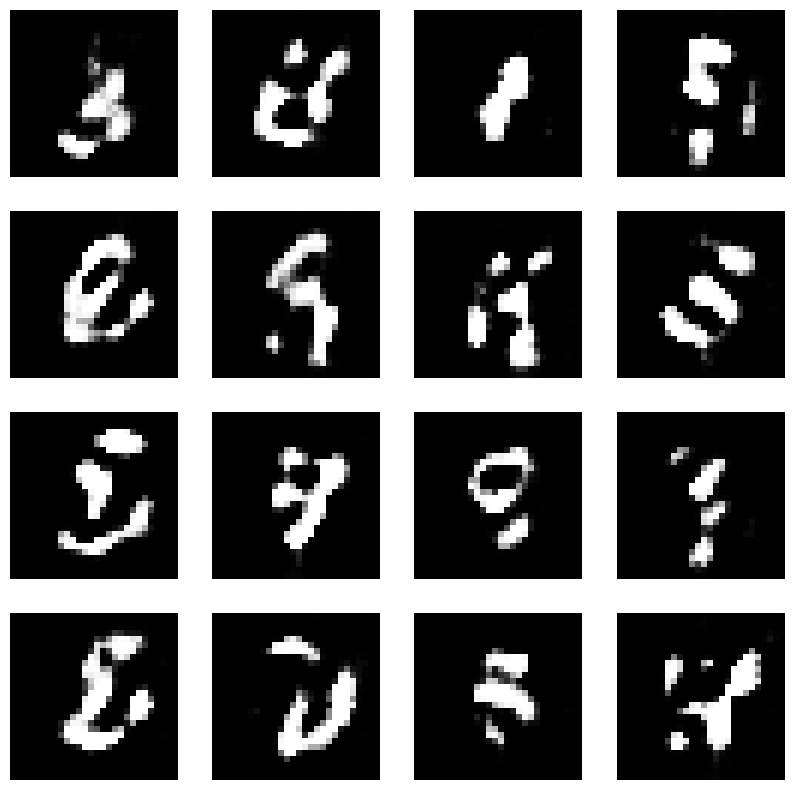

Epoch:  31


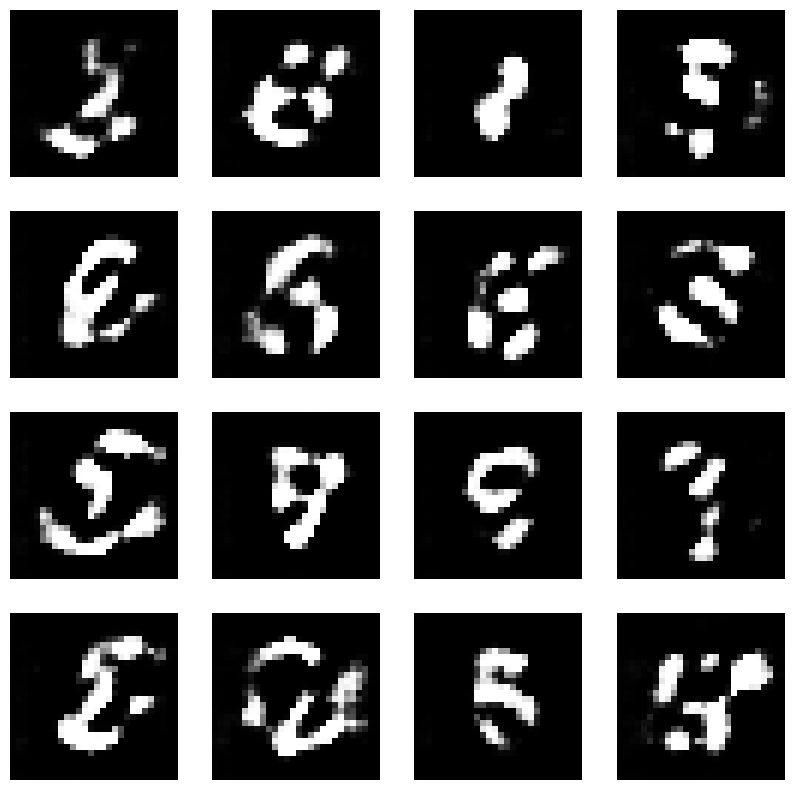

Epoch:  32


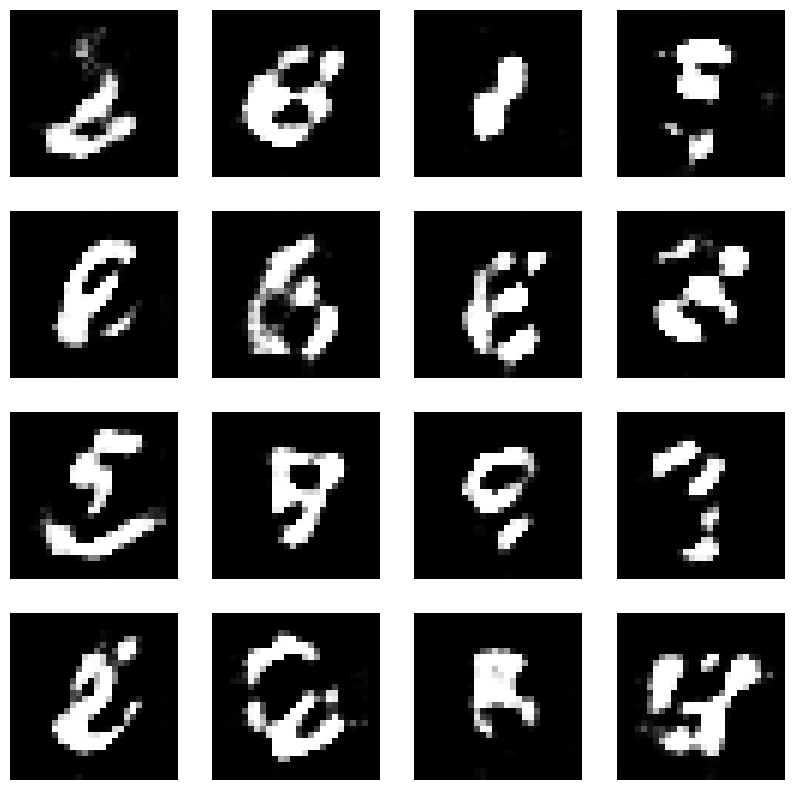

Epoch:  33


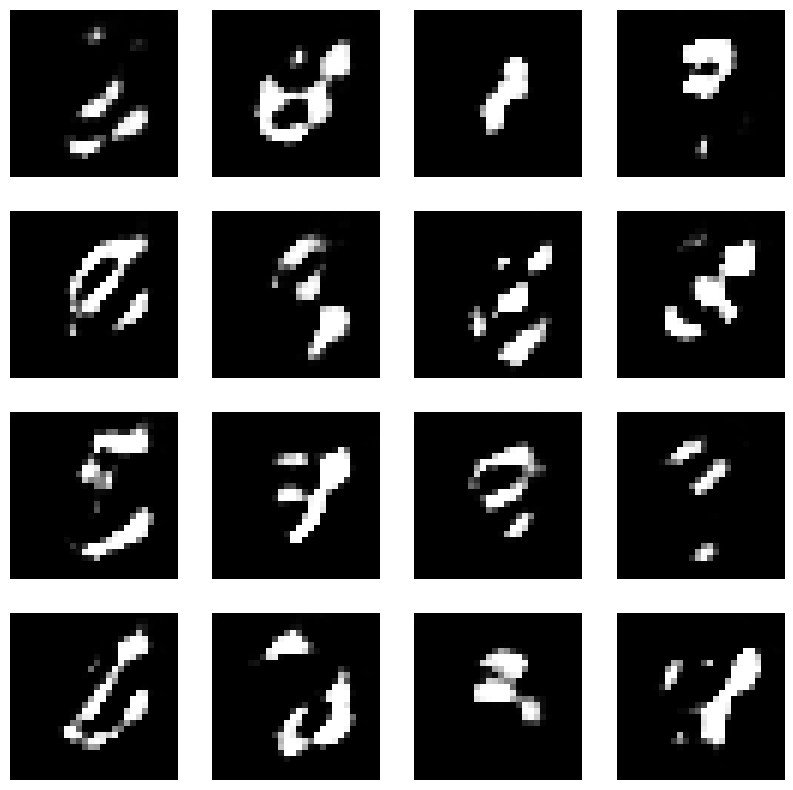

Epoch:  34


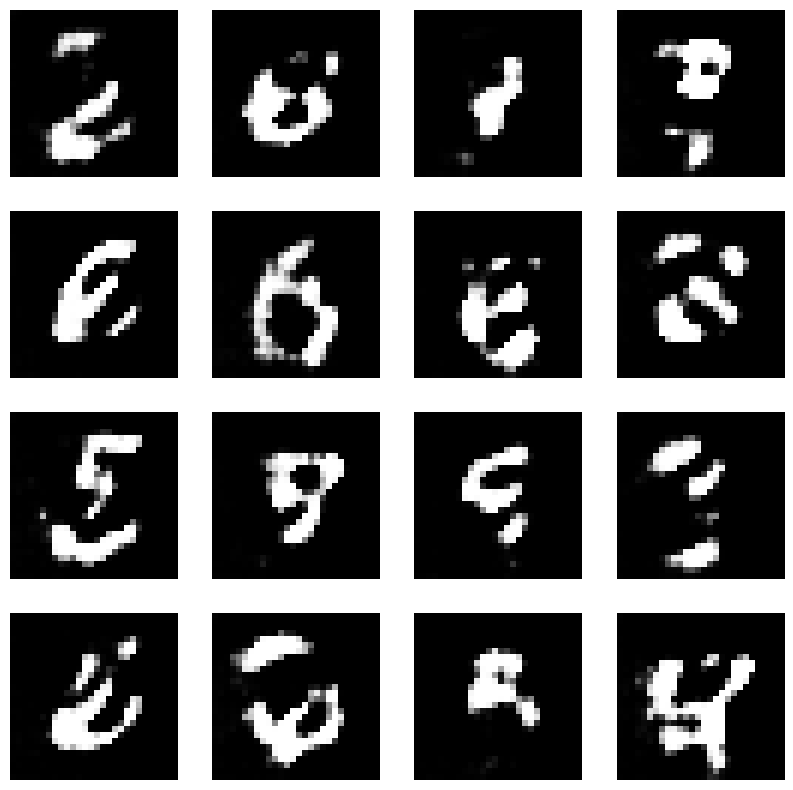

Epoch:  35


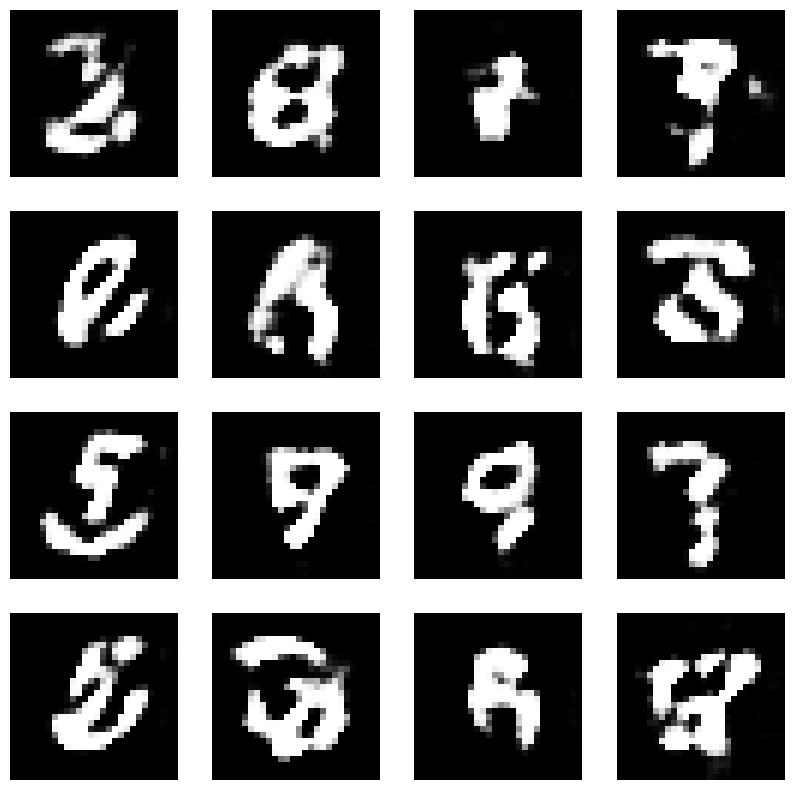

Epoch:  36


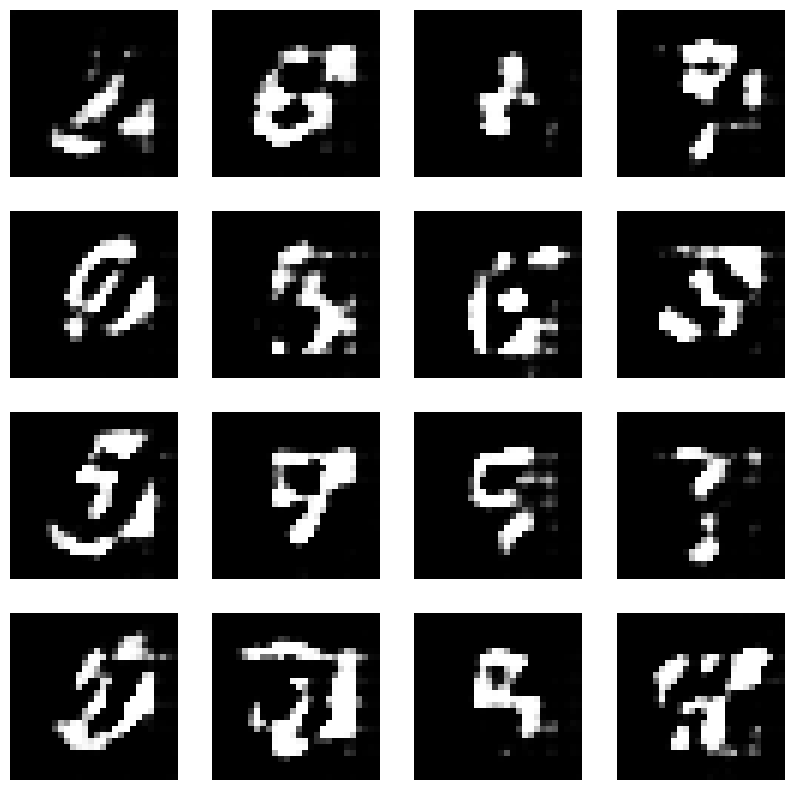

Epoch:  37


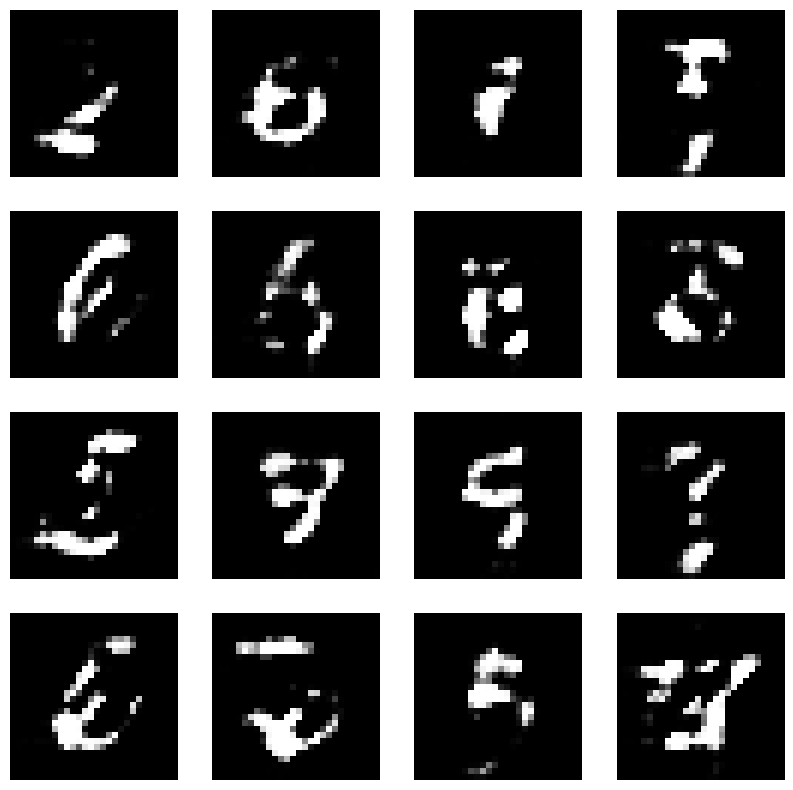

Epoch:  38


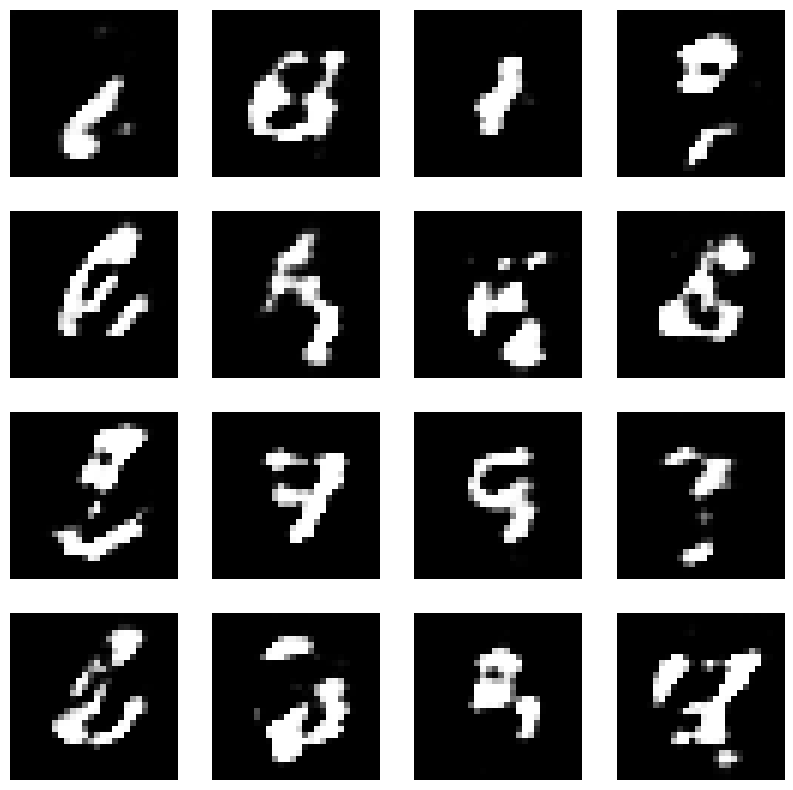

Epoch:  39


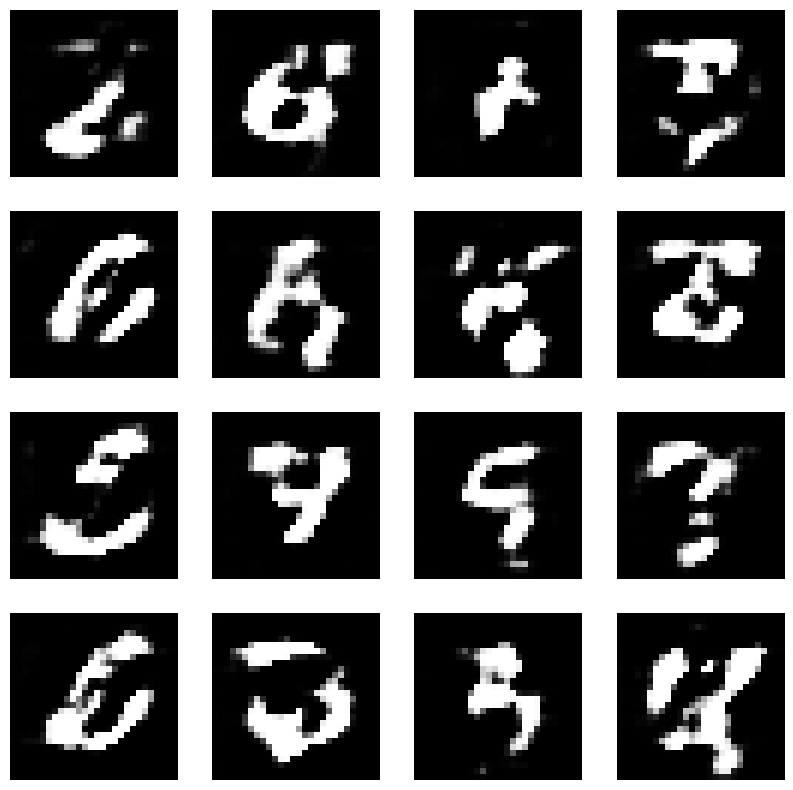

Epoch:  40


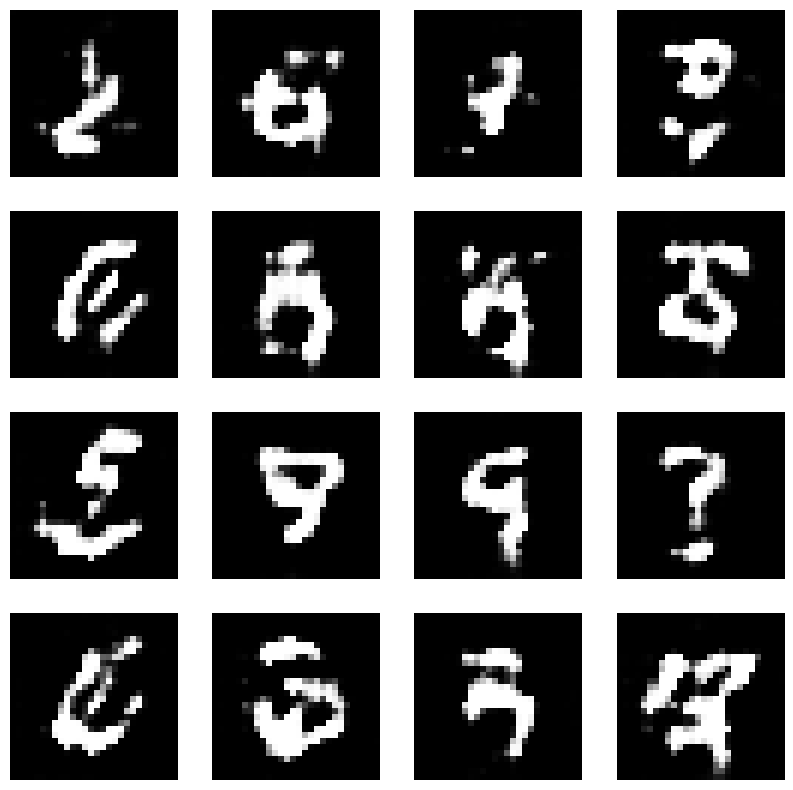

Epoch:  41


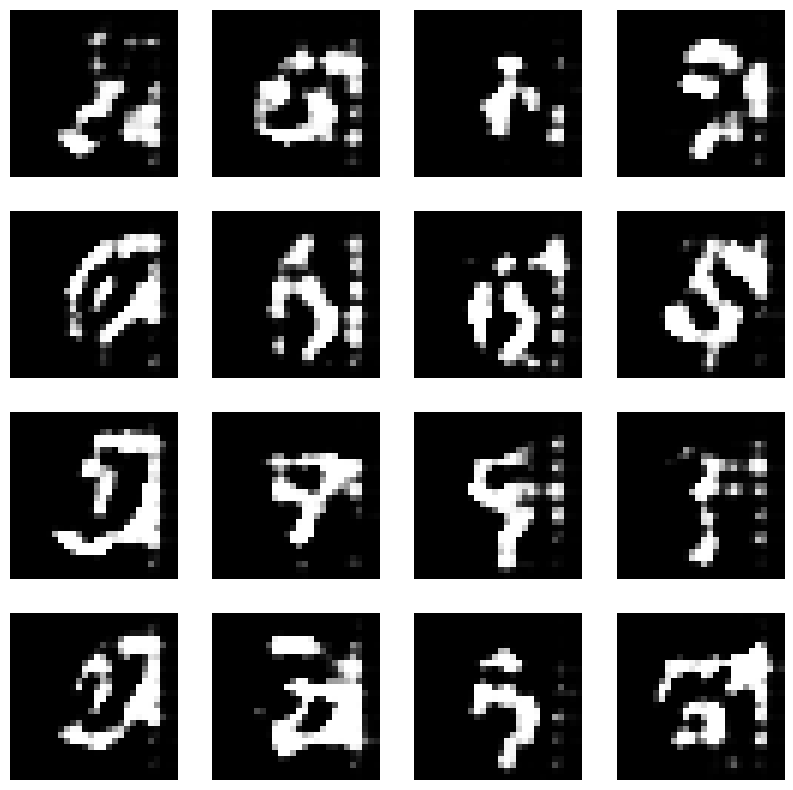

Epoch:  42


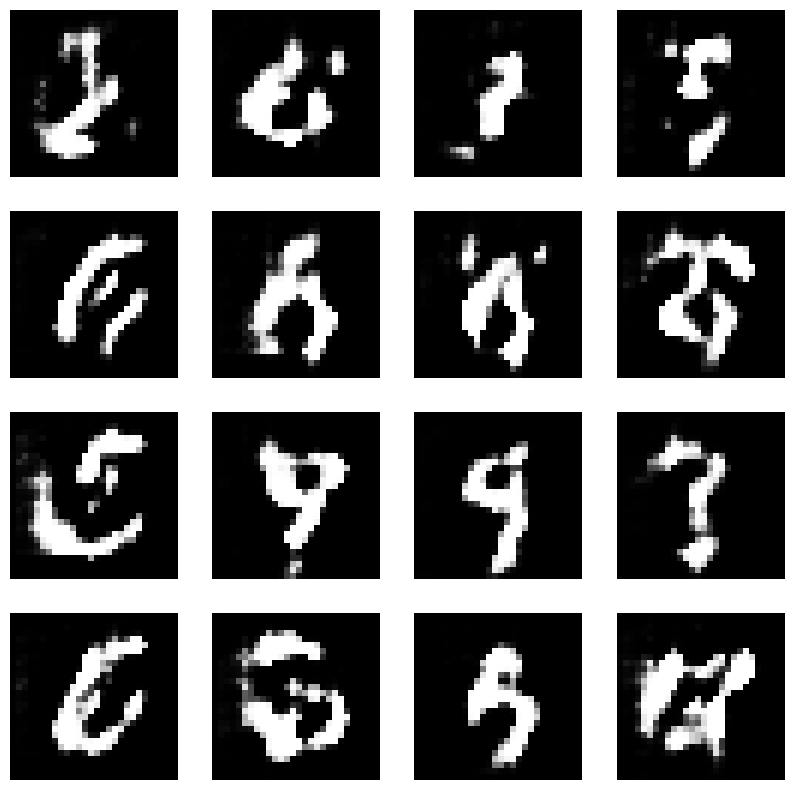

Epoch:  43


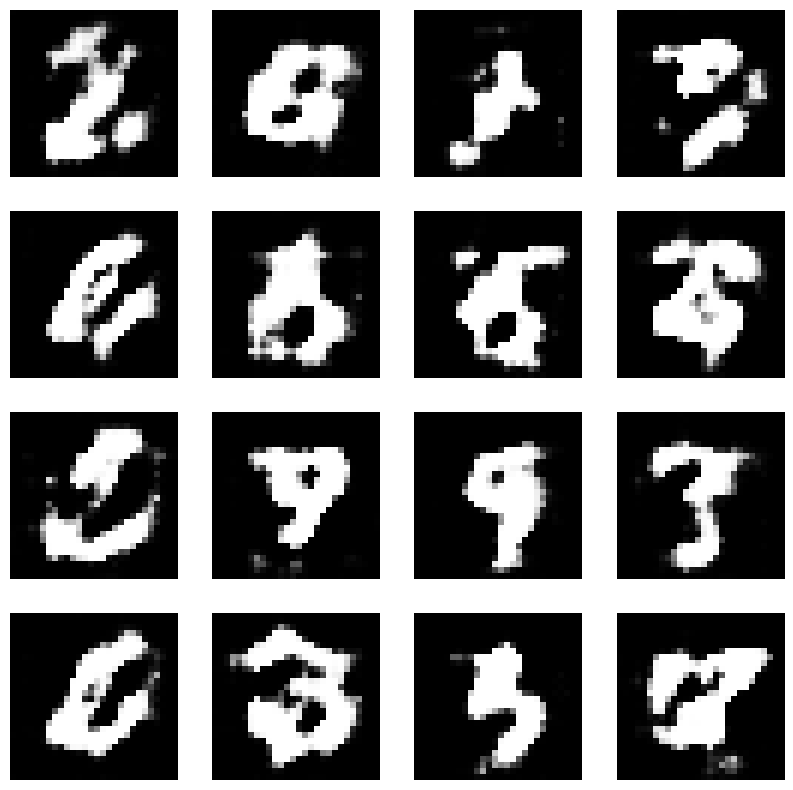

Epoch:  44


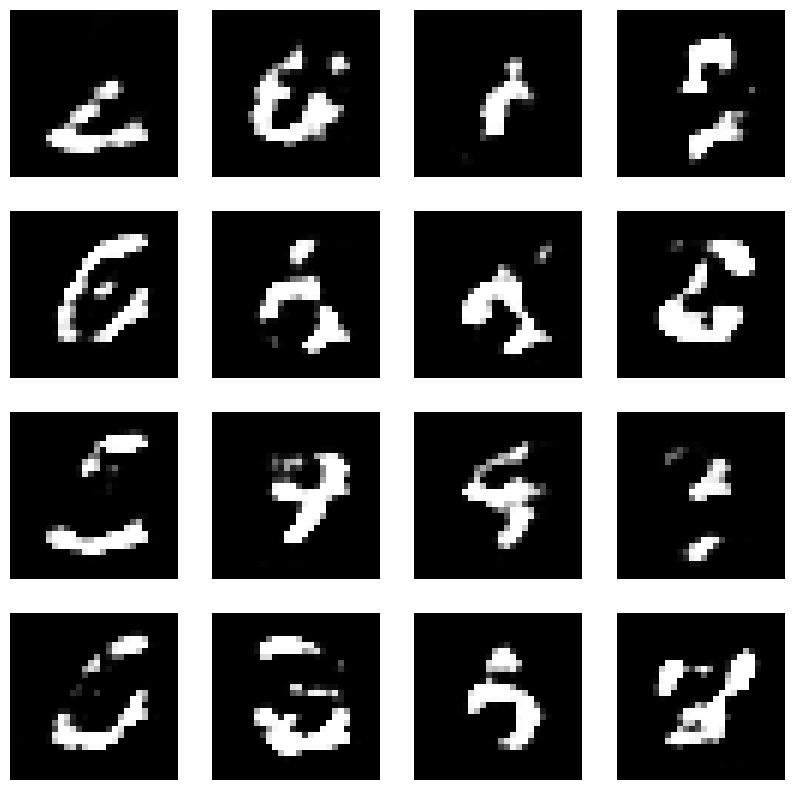

Epoch:  45


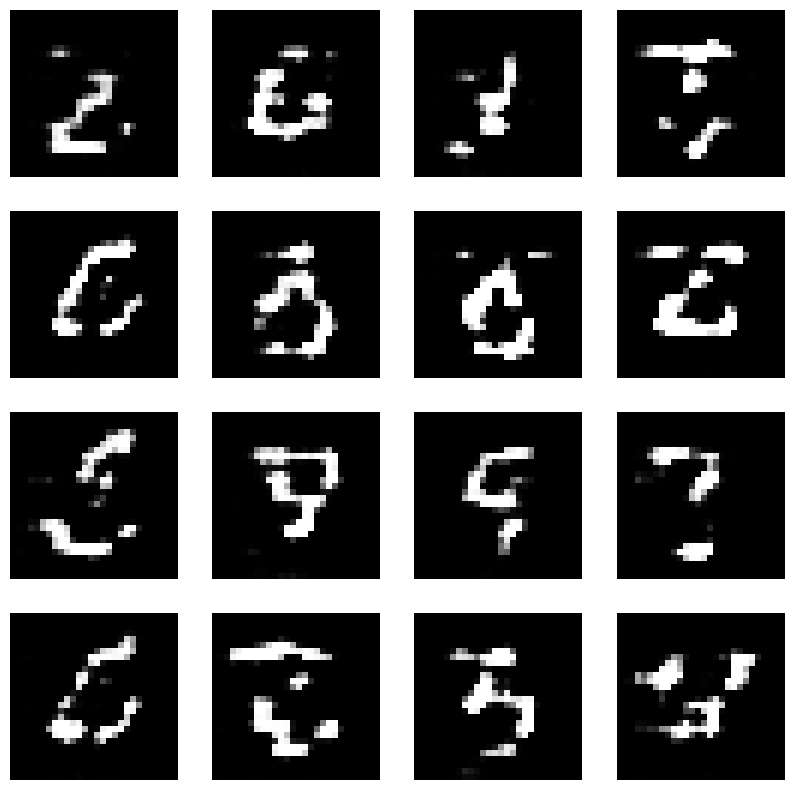

Epoch:  46


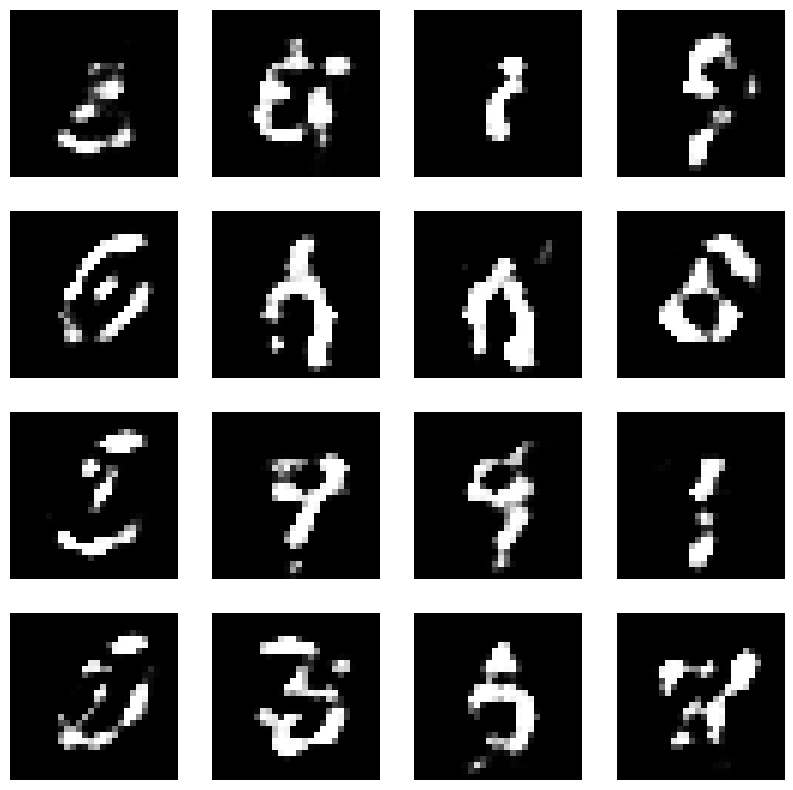

Epoch:  47


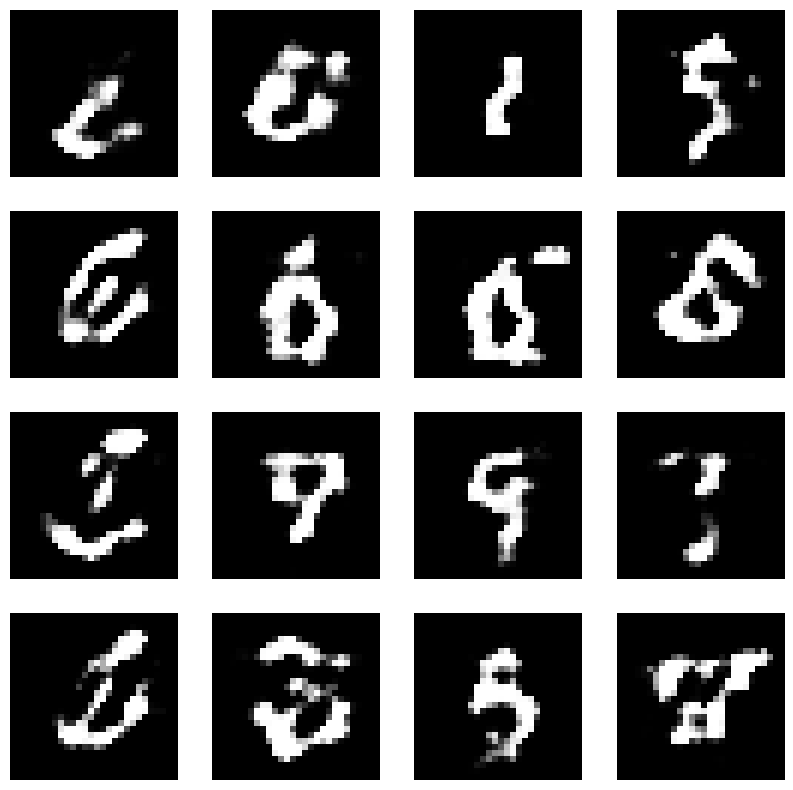

Epoch:  48


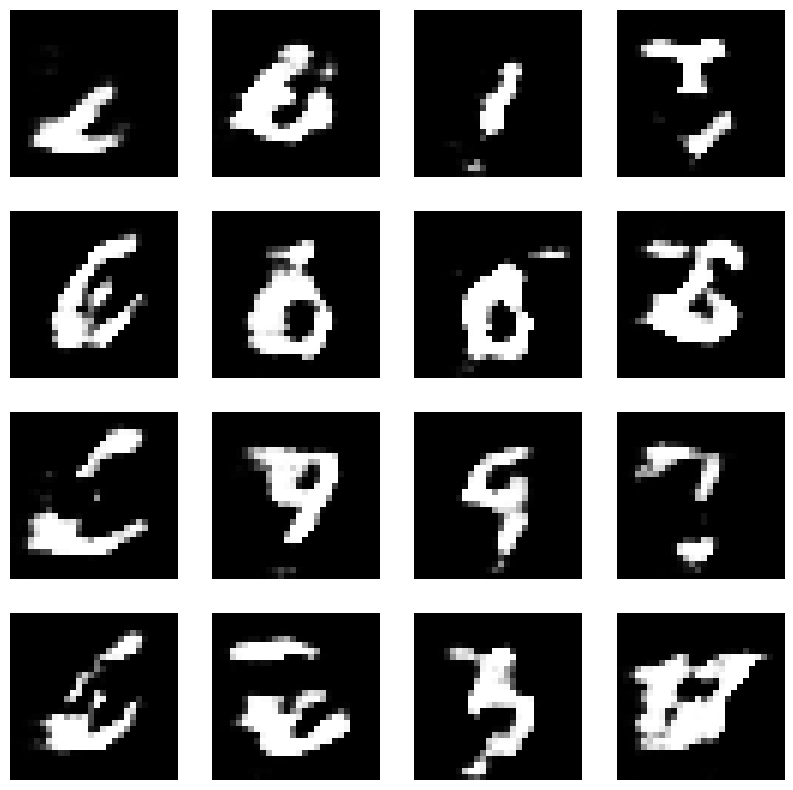

Epoch:  49


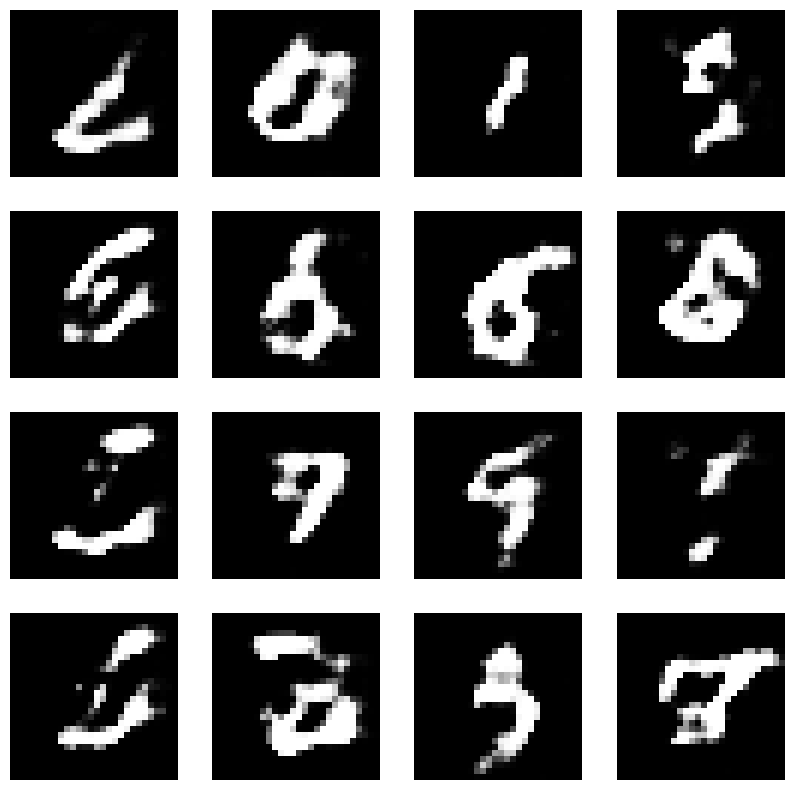

Epoch:  50


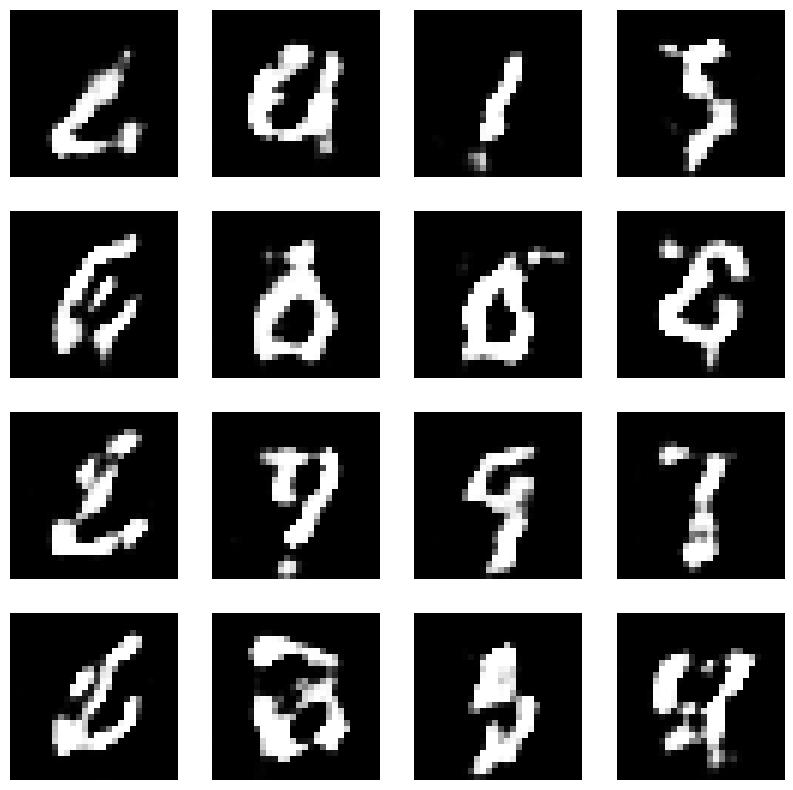

Epoch:  51


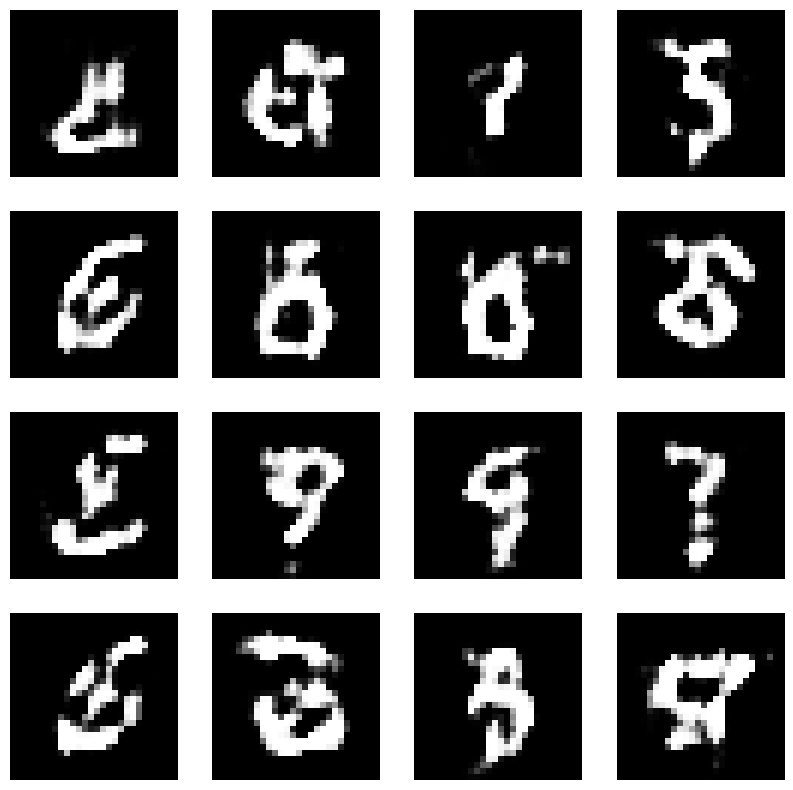

Epoch:  52


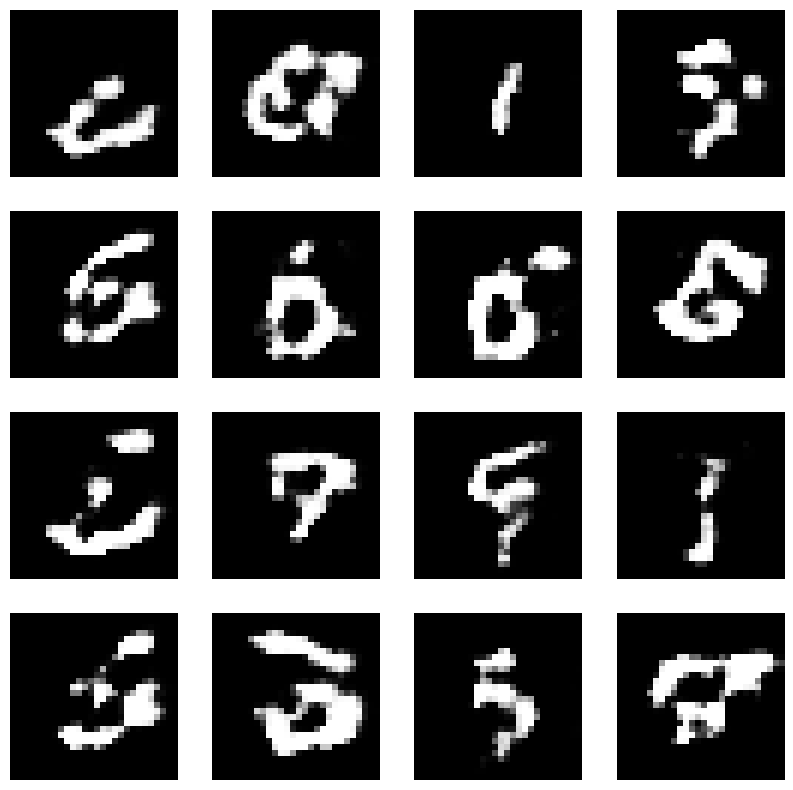

Epoch:  53


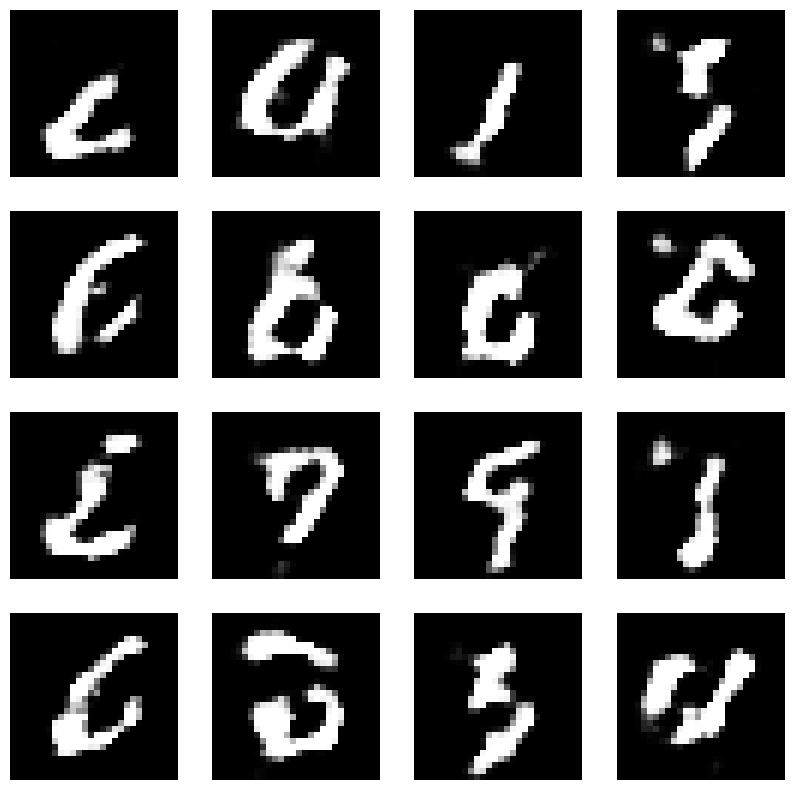

Epoch:  54


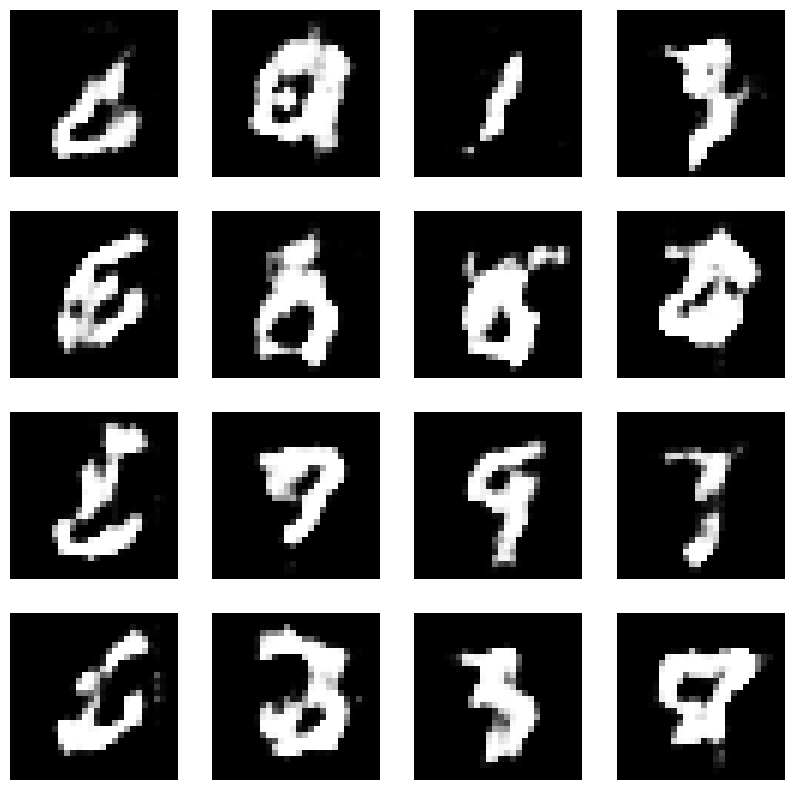

KeyboardInterrupt: 

In [164]:
train(X_train, epochs, test_images)